# Medicine and Emotions: Analyzing Drug Reviews through the Lens of NLP and Deep Learning
## Capstone Project by Chandler Vulu
*Drug Review Dataset (Drugs.com)*

## What am I interested in and how will it help the pharmaceutical company?

This dataset is all about sentiment analysis and customer satisfaction with drugs they have used.

Columns are:
1. drugName (categorical): name of drug
2. condition (categorical): name of condition
3. review (text): patient review
4. rating (numerical): 10 star patient rating
5. date (date): date of review entry
6. usefulCount (numerical): number of users who found review useful

The data came packaged in training (75%) and testing (25%) partitions and stored in two .tsv (tab-separated-values) files, respectively.

**Business question?**

How can we leverage our knowledge of our customers to implement changes to our business that will improve our revenue?

Data Science questions for this dataset:

(1) Can we use customer reviews to predict customer sentiment towards a range of drugs and medical conditions to open up new avenues for market research?

(2) Are there any drugs or conditions which are more negatively reviewed among customers?

(3) Can we analyze negatively reviewed conditions and drugs to identify potential niches or unmet needs that may present opportunities for new market research or product development?

(4) Can we translate the machine learning insights from this project into actionable information or visuals for non-technical employees?

This would be great to get an idea of how customers feel about a broad range of products, allowing the business to identify drugs and conditions with worse or better sentiment, allowing for adjustment to their marketing and sales accordingly. Finally the company would gain a better understanding of their weaker products, potentially revealing new avenues for research and development, and better key-word associations with products.

Link: https://archive.ics.uci.edu/dataset/462/drug+review+dataset+drugs+com


## Import libraries & data

In [259]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from numpy import argmax
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.stem import WordNetLemmatizer
import gradio as gr
import tensorflow as tf
from keras.models import load_model


In [3]:
# Create path shortcuts
drugs_test = "C:/Users/Chandler/Documents/Coding/AUT_IOD_Data_Science_Coursework/Projects/Capstone_Project/Data/Drug_Review_Dataset/drugsComTest_raw.tsv"
drugs_train = "C:/Users/Chandler/Documents/Coding/AUT_IOD_Data_Science_Coursework/Projects/Capstone_Project/Data/Drug_Review_Dataset/drugsComTrain_raw.tsv"

# Create dataframes
df_test = pd.read_csv(drugs_test, sep="\t")
df_train = pd.read_csv(drugs_train, sep="\t")

# Convert column names to lowercase
df_test.columns = df_test.columns.str.lower()
df_train.columns = df_train.columns.str.lower()


In [4]:
# Concatenate the dataframes
df = pd.concat([df_train, df_test], ignore_index=True)

# Print the first few rows of the combined dataframe
print(df.head())


   unnamed: 0                  drugname                     condition  \
0      206461                 Valsartan  Left Ventricular Dysfunction   
1       95260                Guanfacine                          ADHD   
2       92703                    Lybrel                 Birth Control   
3      138000                Ortho Evra                 Birth Control   
4       35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating  \
0  "It has no side effect, I take it in combinati...     9.0   
1  "My son is halfway through his fourth week of ...     8.0   
2  "I used to take another oral contraceptive, wh...     5.0   
3  "This is my first time using any form of birth...     8.0   
4  "Suboxone has completely turned my life around...     9.0   

                date  usefulcount  
0       May 20, 2012           27  
1     April 27, 2010          192  
2  December 14, 2009           17  
3   November 3, 2015           1

In [5]:
# Print the last few rows
df.tail()

,unnamed: 0,drugname,condition,review,rating,date,usefulcount
215058,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10.0,"September 13, 2014",43
215059,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9.0,"October 8, 2016",11
215060,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8.0,"November 15, 2010",7
215061,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1.0,"November 28, 2011",20
215062,113712,Arthrotec,Sciatica,"""It works!!!""",9.0,"September 13, 2009",46


In [266]:
# Date range of dataset
recent_date = df.date.max()
oldest_date = df.date.min()

print('Date Range:', oldest_date, ' - ', recent_date)

Date Range: April 1, 2008  -  September 9, 2017


In [ ]:
# What year range was this data taken from?
print()

In [6]:
# Dimensions of the dataset
print("Columns, rows:", df.shape)


Columns, rows: (215063, 7)


In [7]:
# See the names and types of the columns
print("Data types:\n", df.dtypes)


Data types:
 unnamed: 0       int64
drugname        object
condition       object
review          object
rating         float64
date            object
usefulcount      int64
dtype: object


## Data Processing


In [8]:
# Check for missing testing values
print(df.isnull().sum())


unnamed: 0        0
drugname          0
condition      1194
review            0
rating            0
date              0
usefulcount       0
dtype: int64


In [9]:
# View missing values
df[df['condition'].isnull()]


,unnamed: 0,drugname,condition,review,rating,date,usefulcount
30,51452,Azithromycin,NaN,"""Very good response. It is so useful for me. """,10.0,"August 18, 2010",1
148,61073,Urea,NaN,"""Accurate information.""",10.0,"July 2, 2011",13
488,132651,Doxepin,NaN,"""So far so good. Good for me and I can take it...",10.0,"October 20, 2010",25
733,44297,Ethinyl estradiol / norgestimate,NaN,"""I haven&#039;t been on it for a long time and...",8.0,"January 24, 2011",1
851,68697,Medroxyprogesterone,NaN,"""I started the shot in July 2015 and ended in ...",6.0,"March 23, 2017",1
...,...,...,...,...,...,...,...
213721,170508,Quetiapine,NaN,"""good for insomnia most of the time""",7.0,"May 27, 2015",10
213785,104629,Ethinyl estradiol / levonorgestrel,NaN,"""I am almost on my third month of my first pac...",5.0,"April 25, 2011",4
213914,104642,Ethinyl estradiol / levonorgestrel,NaN,"""I have been taking this birth control for two...",10.0,"January 11, 2011",1
214039,720,Medroxyprogesterone,NaN,"""I have been using the shot for 7 years now an...",10.0,"April 21, 2011",1


In [10]:
# Replace missing values with new 'Unknown' category
df["condition"].fillna("unknown", inplace=True)

# Check for missing values
print("Remaining missing values:", df.isnull().sum())


Remaining missing values: unnamed: 0     0
drugname       0
condition      0
review         0
rating         0
date           0
usefulcount    0
dtype: int64


In [11]:
# Verify columns
print(df.columns)


Index(['unnamed: 0', 'drugname', 'condition', 'review', 'rating', 'date',
       'usefulcount'],
      dtype='object')


In [12]:
# Remove unnamed column, likely a leftover unique identifier column
df["unnamed: 0"].describe()


count    215063.000000
mean     116039.364814
std       67007.913366
min           0.000000
25%       58115.500000
50%      115867.000000
75%      173963.500000
max      232291.000000
Name: unnamed: 0, dtype: float64

In [13]:
# Drop Unnamed: 0 column, it is likely just a unique identifier
df = df.drop("unnamed: 0", axis=1)

# Check dataframe
df


,drugname,condition,review,rating,date,usefulcount
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37
...,...,...,...,...,...,...
215058,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10.0,"September 13, 2014",43
215059,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9.0,"October 8, 2016",11
215060,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8.0,"November 15, 2010",7
215061,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1.0,"November 28, 2011",20


In [14]:
# Check for imbalance in the target
df.rating.value_counts()


10.0    68005
9.0     36708
1.0     28918
8.0     25046
7.0     12547
5.0     10723
2.0      9265
3.0      8718
6.0      8462
4.0      6671
Name: rating, dtype: int64

In [17]:
%%time
# Convert rating numbers into positive, neutral or negative categories
# Define the boundaries for the bins
bins = [0, 3, 7, 10]

# Define the labels for the bins
labels = ["negative", "neutral", "positive"]

# Create a new column named 'sentiment'
df['sentiment'] = pd.cut(df['rating'], bins=bins, labels=labels, include_lowest=True)


Wall time: 20.9 ms


## EDA


In [18]:
df.head()

,drugname,condition,review,rating,date,usefulcount,sentiment
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27,positive
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,positive
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17,neutral
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,positive
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37,positive


In [271]:
# Check out sentiment distribution
print('Distribution of Sentiment values:\n', df.sentiment.value_counts())

Distribution of Sentiment values:
 positive    129759
negative     46901
neutral      38403
Name: sentiment, dtype: int64
1/1 [==============================] - 0s 49ms/step


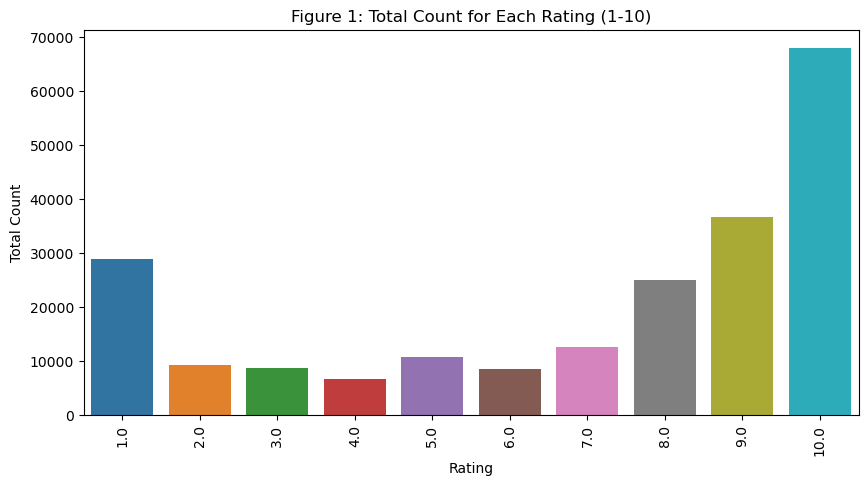

In [88]:
# Count the number of occurrences for each rating
rating_counts = df['rating'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=rating_counts.index, y=rating_counts.values)
plt.xticks(rotation=90)
plt.ylabel('Total Count')
plt.xlabel('Rating')
plt.title('Figure 1: Total Count for Each Rating (1-10)')
plt.show()


**Figure 1:** This dataset is extremely imbalanced, with significant differences between most columns. Especially for rating 10, the most positive rating, which contains almost double the count of the next highest rating count. Ratings appear to be polarised between either very positive or very negative; this follows the conventional wisdom of customers only reviewing after a very good or bad experience.

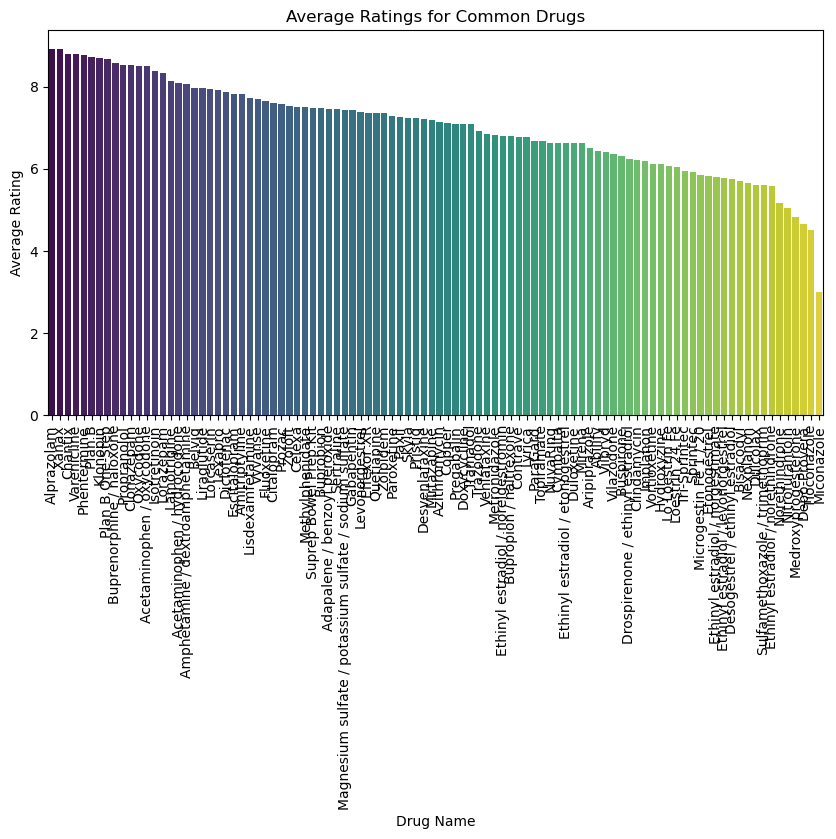

In [97]:
# Count the number of occurrences for each drug
drug_counts = df['drugname'].value_counts()

# Filter drug names that occur more than 500 times
common_drugs = drug_counts[drug_counts > 500].index

# Filter DataFrame to include only common drugs
filtered_df = df[df['drugname'].isin(common_drugs)]

# Find average rating for common drugs
average_ratings = filtered_df.groupby('drugname')['rating'].mean()

# Sort values for better visualization
average_ratings = average_ratings.sort_values(ascending=False)

# Plot the average ratings
plt.figure(figsize=(10, 5))
sns.barplot(x=average_ratings.index, y=average_ratings.values, palette="viridis")
plt.title('Average Ratings for Common Drugs')
plt.xlabel('Drug Name')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()


In [205]:
print('Drugs which have been reviewed more than 500 times:', drug_counts[drug_counts > 500].count())

Drugs which have been reviewed more than 500 times 98


In [209]:
print('Drugs which have been reviewed less than 500 times:', drug_counts[drug_counts < 500].count())

Drugs which have been reviewed less than 500 times: 3573


The above plot is visually confusing, there are too many drugs to effectively show them all at once. It does however show that the most highly reviewed drugs are  on average rated higher than 5.

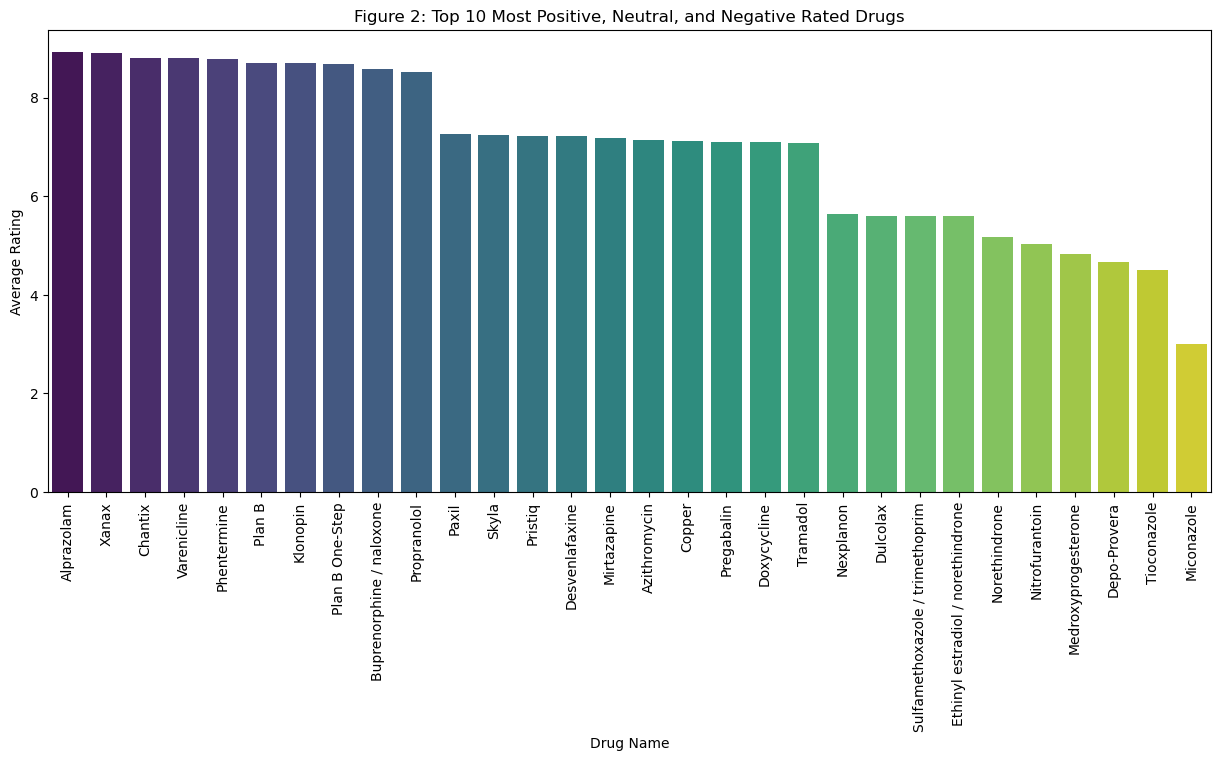

In [100]:
# Visualise the top 10 positive, neutral and negative rated drugs
# Compute the average rating for each drug
average_ratings = df.groupby('drugname')['rating'].mean()

# Filter drugs with more than 500 counts
average_ratings = average_ratings[drug_counts > 500]

# Sort the ratings
sorted_ratings = average_ratings.sort_values()

# Select the top, middle, and bottom 10 drugs
top_10 = sorted_ratings.tail(10)
middle_10 = sorted_ratings[len(sorted_ratings)//2 - 5 : len(sorted_ratings)//2 + 5]
bottom_10 = sorted_ratings.head(10)

# Combine the top, middle, and bottom 10 drugs into a single DataFrame
combined_ratings = pd.concat([top_10, middle_10, bottom_10])

# Sort the combined ratings in descending order
sorted_combined_ratings = combined_ratings.sort_values(ascending=False)

# Plot the sorted combined ratings
plt.figure(figsize=(15, 6))
sns.barplot(x=sorted_combined_ratings.index, y=sorted_combined_ratings.values, palette="viridis")
plt.title('Figure 2: Top 10 Most Positive, Neutral, and Negative Rated Drugs')
plt.xlabel('Drug Name')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()


**Figure 2:** Alprazolam and Xanax, which is the brand name for Alprazolam, are anxiety medications and the most highly rated drugs on average, while Depo Provera (birth control), Miconazole and Tioconazole (anti-fungal treatments) are the most negatively rated drugs.

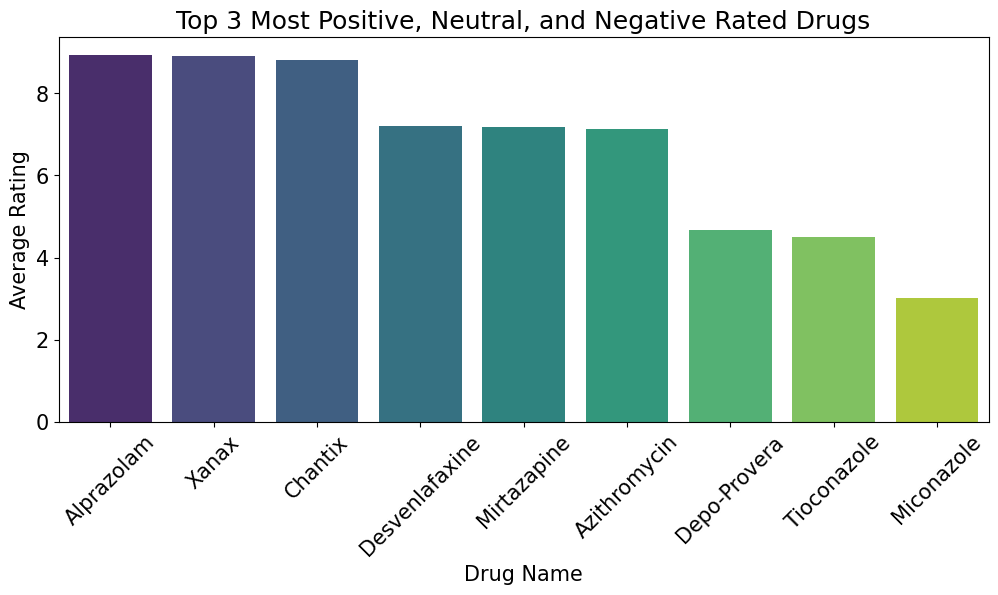

In [248]:
# For the presentation
# Select the top, middle, and bottom 3 drugs
top_3 = sorted_ratings.tail(3)
middle_3 = sorted_ratings[len(sorted_ratings)//2 - 1 : len(sorted_ratings)//2 + 2]
bottom_3 = sorted_ratings.head(3)

# Combine the top, middle, and bottom 3 drugs into a single DataFrame
combined_ratings = pd.concat([top_3, middle_3, bottom_3])

# Sort the combined ratings in descending order
sorted_combined_ratings = combined_ratings.sort_values(ascending=False)

# Plot the sorted combined ratings
plt.figure(figsize=(12, 5))
sns.barplot(x=sorted_combined_ratings.index, y=sorted_combined_ratings.values, palette="viridis")
plt.title('Top 3 Most Positive, Neutral, and Negative Rated Drugs', fontsize=18)
plt.xlabel('Drug Name', fontsize=15)
plt.ylabel('Average Rating', fontsize=15)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)

plt.show()


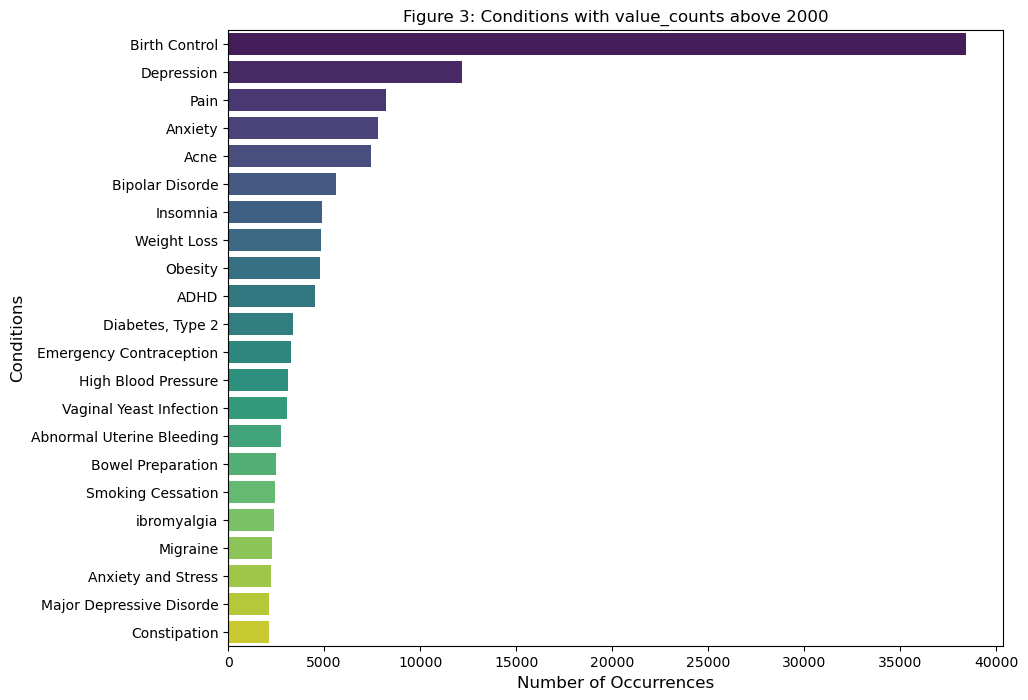

In [101]:
# Get conditions with value_counts above 2000
conditions_counts = df['condition'].value_counts()
conditions_over_2000 = conditions_counts[conditions_counts > 2000]

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x=conditions_over_2000.values, y=conditions_over_2000.index, palette="viridis")

plt.title('Figure 3: Conditions with value_counts above 2000')
plt.xlabel('Number of Occurrences', fontsize=12)
plt.ylabel('Conditions', fontsize=12)
plt.show()

**Figure 3:** Birth control is by far the most reported condition, followed by depression, pain, anxiety and acne for the runner ups.

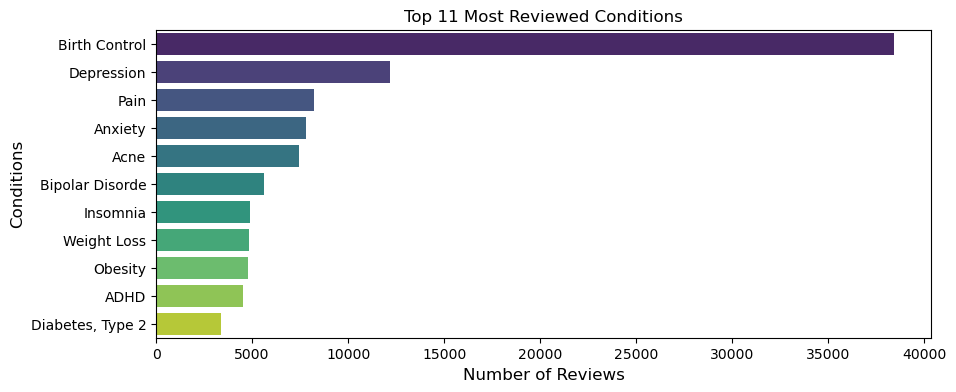

In [219]:
# Plot for the capstone presentation
# Get conditions with value_counts above 2000
conditions_counts = df['condition'].value_counts()
conditions_over_2000 = conditions_counts[conditions_counts > 2000]

# Take the top half of the conditions
top_half_conditions = conditions_over_2000[:len(conditions_over_2000)//2]

# Plot
plt.figure(figsize=(10, 4))
sns.barplot(x=top_half_conditions.values, y=top_half_conditions.index, palette="viridis")

plt.title('Top 11 Most Reviewed Conditions', fontsize=12)
plt.xlabel('Number of Reviews', fontsize=12)
plt.ylabel('Conditions', fontsize=12)
plt.show()


The above image was made for the capstone presentation only. It is the top 11 results from Figure 3.

## Are there any conditions which associate with positive or negative sentiment more frequently?

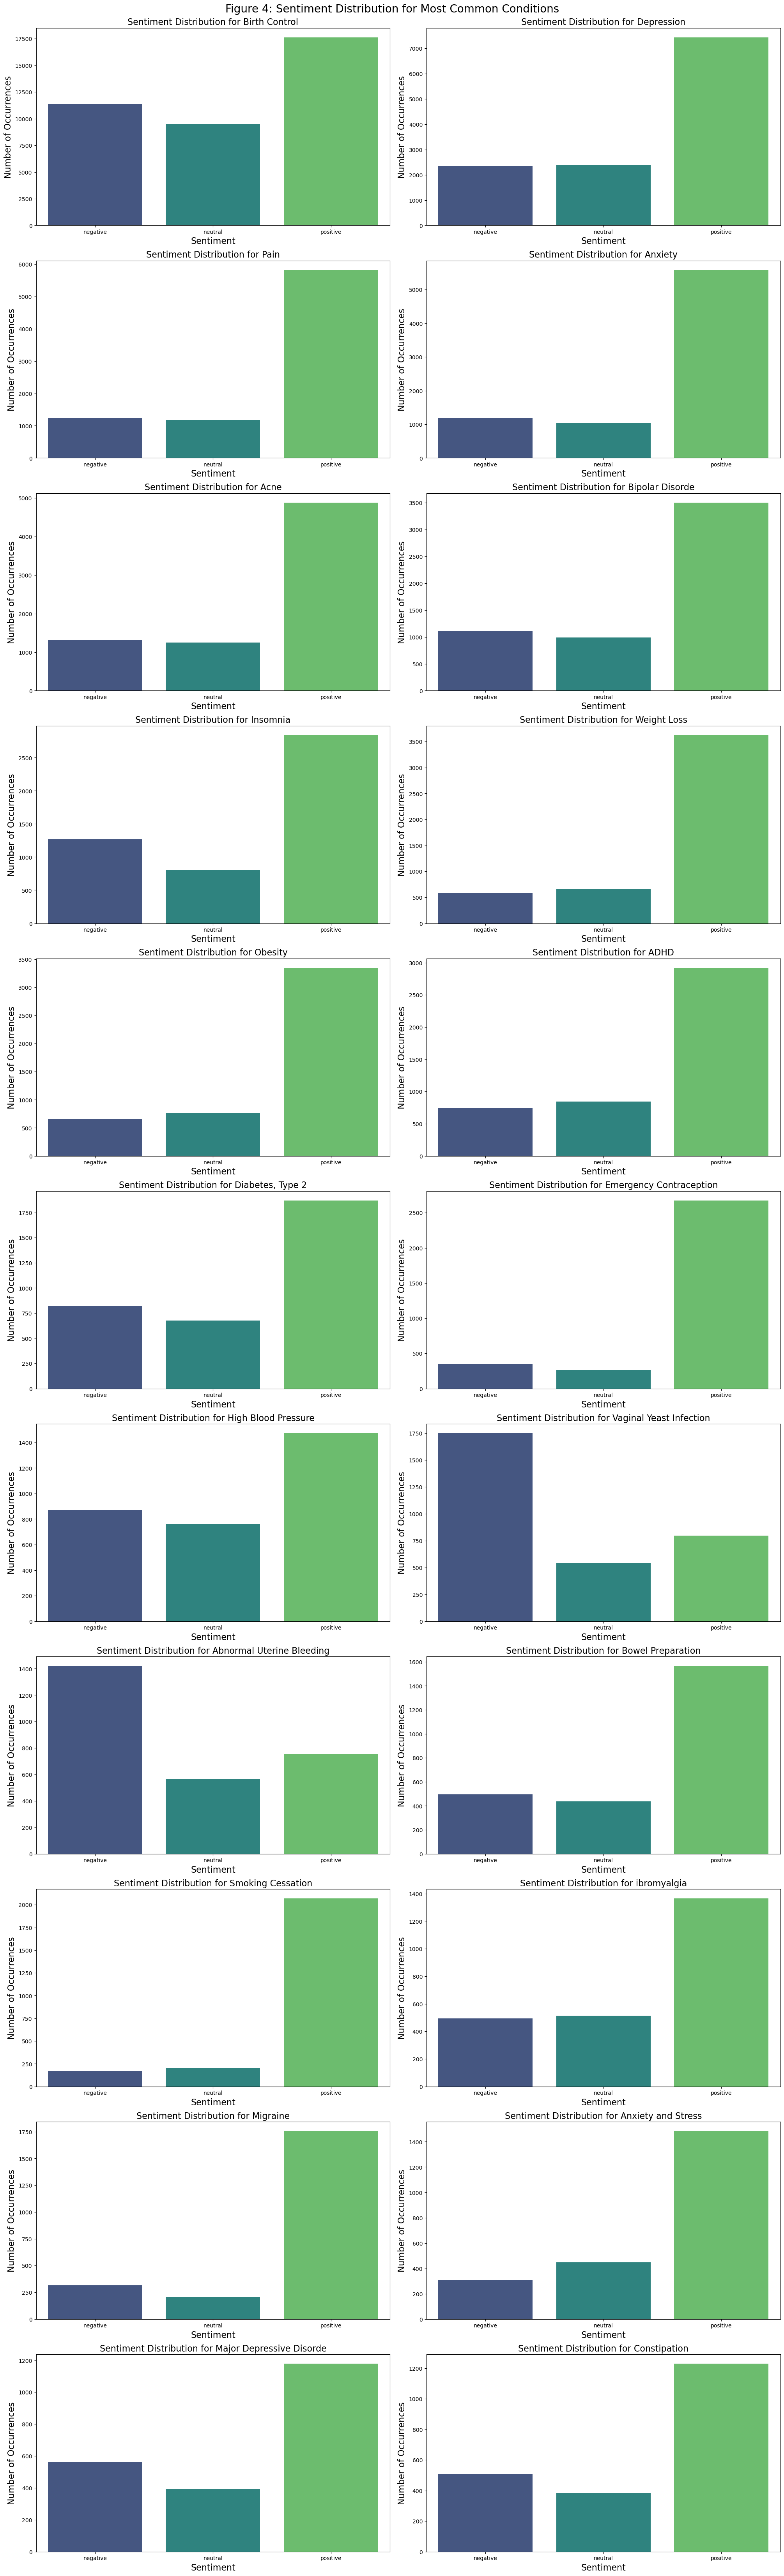

1/1 [==============================] - 0s 27ms/step


In [186]:
#Plot the sentiment distribution of conditions with more than 2000 occurences

def plot_sentiment_for_conditions(conditions):
    # Calculate the number of rows needed for subplots, based on the number of conditions
    nrows = len(conditions) // 2 if len(conditions) % 2 == 0 else len(conditions) // 2 + 1

    # Create a figure and axes with subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(20, 6*nrows), constrained_layout=True)

    # Flatten the axes for easier indexing
    axes = axes.flatten()

    for i, condition_name in enumerate(conditions):
        # Filter dataframe for the given condition
        condition_df = df[df['condition'] == condition_name]

        # Count occurrences of each sentiment
        sentiment_counts = condition_df['sentiment'].value_counts()

        # If condition_df is empty (i.e., no such condition exists), continue to next condition
        if condition_df.empty:
            continue

        # Plot on the i-th subplot
        sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis", ax=axes[i])

        axes[i].set_title(f'Sentiment Distribution for {condition_name}', fontsize=16)
        axes[i].set_ylabel('Number of Occurrences', fontsize=16)
        axes[i].set_xlabel('Sentiment', fontsize=16)

    # Remove any unused subplots
    if len(conditions) % 2 != 0:
        fig.delaxes(axes[-1])

    # Add main title
    fig.suptitle('Figure 4: Sentiment Distribution for Most Common Conditions', fontsize=20)

    plt.show()

# Get conditions with value_counts above 2000
conditions_counts = df['condition'].value_counts()
conditions_over_2000 = conditions_counts[conditions_counts > 2000].index.tolist()

# Call the function with conditions having more than 2000 reviews
plot_sentiment_for_conditions(conditions_over_2000)


**Figure 4:** Many drugs follow the total count distribution of vastly more positive, some negative and few neutral sentiment. However, there are exceptions which include Birth Control whose positive sentiment isn't as high as expected, Vaginal Yeast Infection and Abnormal Uterine Bleeding whose negative sentiment vastly outweighs their negative and positive sentiment. This is mirrored by their respective drugs, tioconazole and medroxyprogesterone which were in the top 10 most negative rated drugs in **Figure 2.**

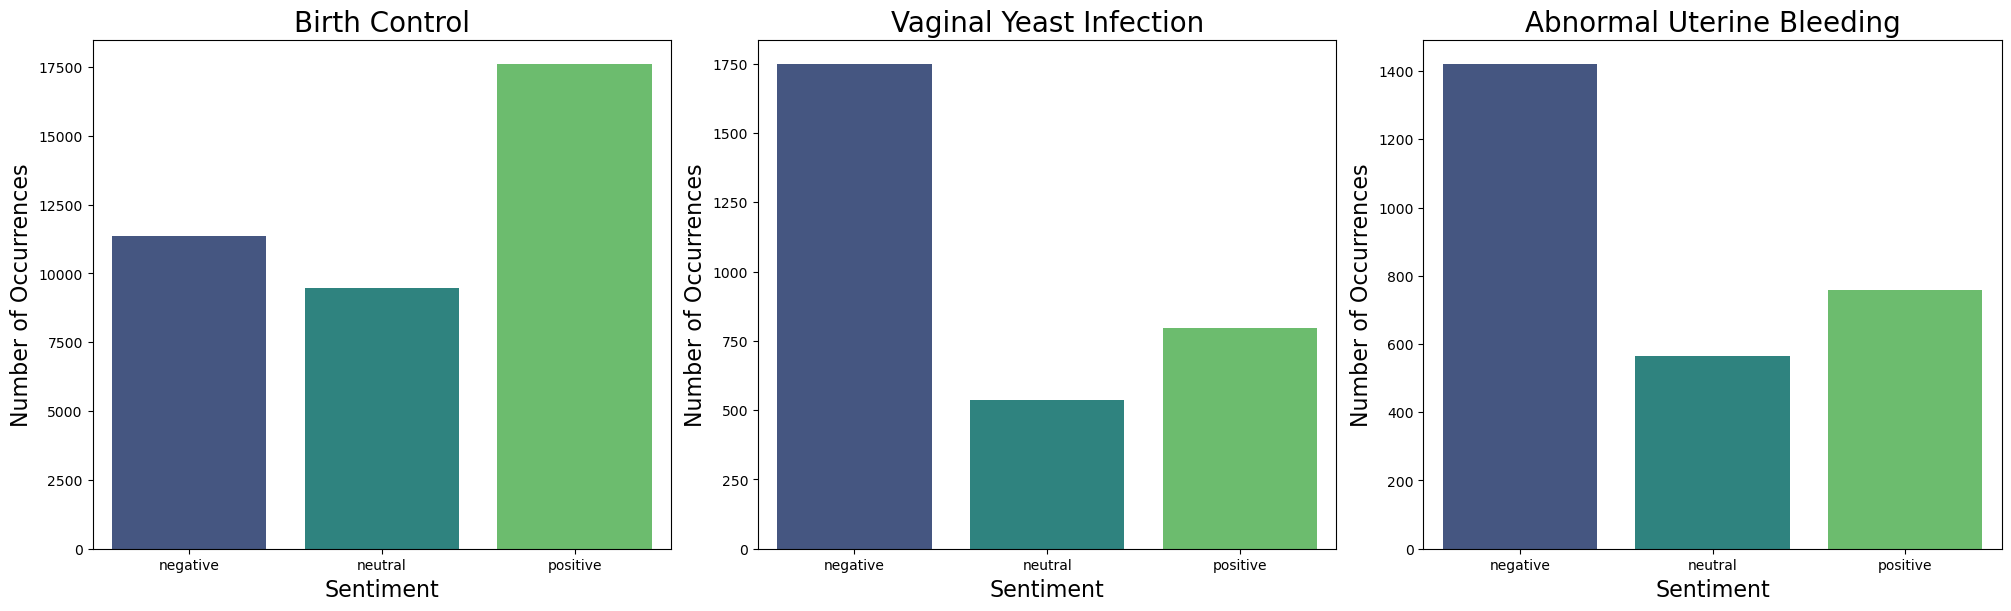

In [195]:
def plot_sentiment_for_conditions(conditions):
    # Create a figure and axes with subplots for the three conditions
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6), constrained_layout=True)

    for i, condition_name in enumerate(conditions):
        # Filter dataframe for the given condition
        condition_df = df[df['condition'] == condition_name]

        # Count occurrences of each sentiment
        sentiment_counts = condition_df['sentiment'].value_counts()

        # Plot on the i-th subplot
        sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis", ax=axes[i])

        axes[i].set_title(f'{condition_name}', fontsize=20)
        axes[i].set_ylabel('Number of Occurrences', fontsize=16)
        axes[i].set_xlabel('Sentiment', fontsize=16)

    plt.show()

# List of specific conditions to plot
conditions_to_plot = ['Birth Control', 'Vaginal Yeast Infection', 'Abnormal Uterine Bleeding']

# Call the function with the specified conditions
plot_sentiment_for_conditions(conditions_to_plot)


The above image was produced for the capstone project only, it is the three conditions associated more with negative reviews.

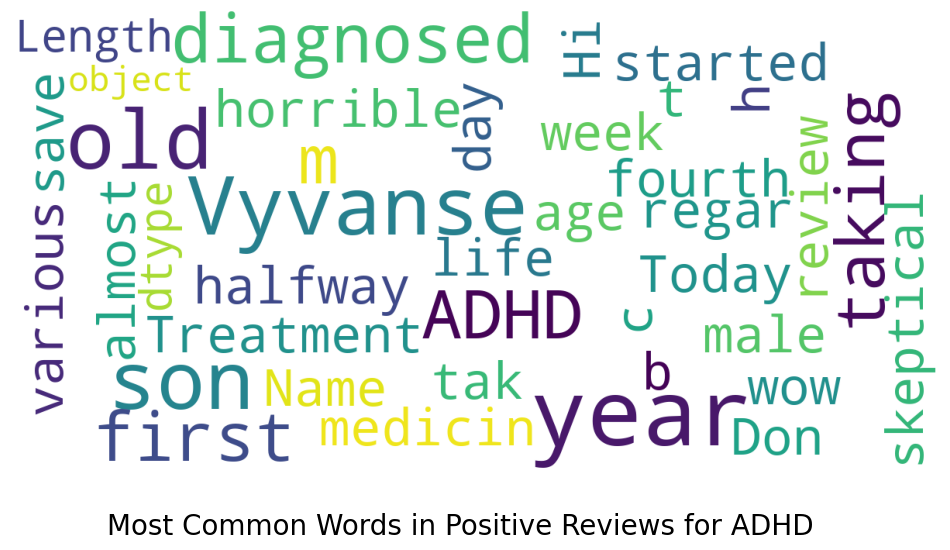

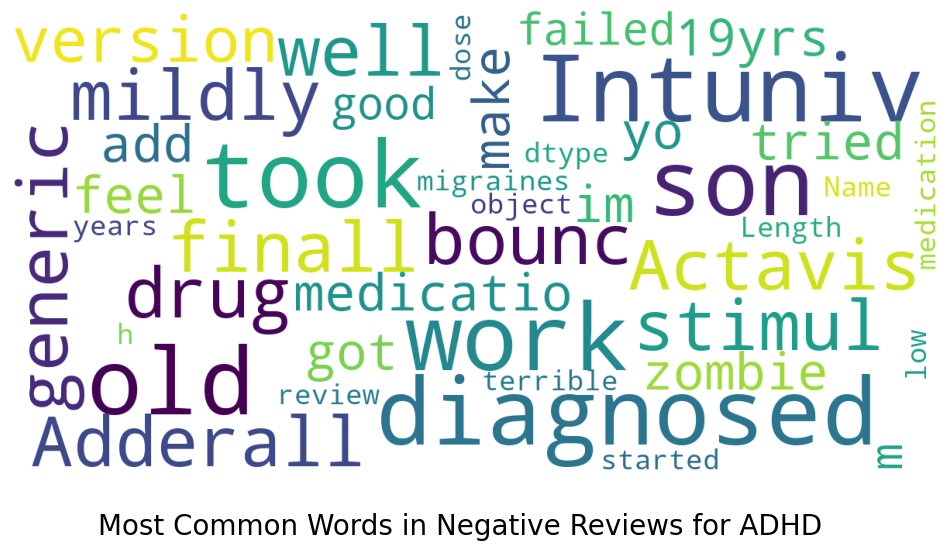

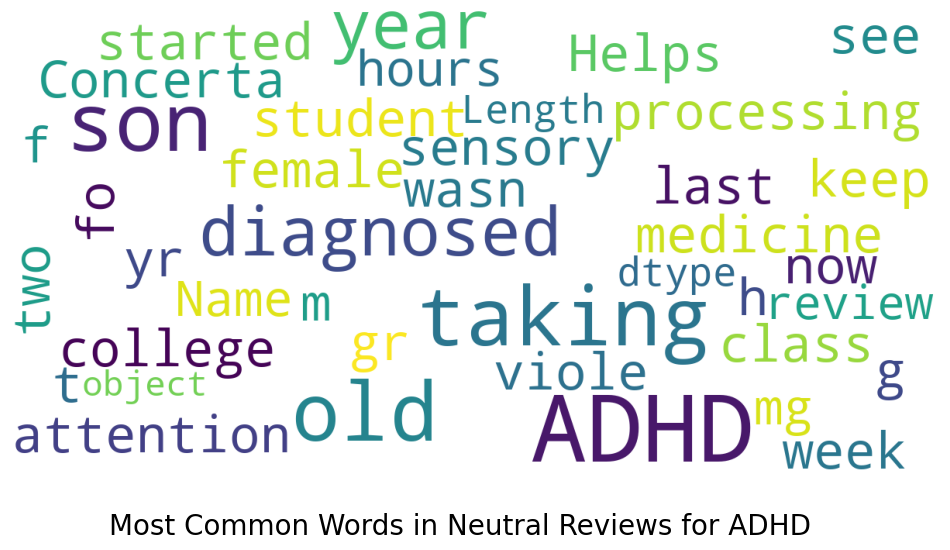

In [25]:
# Word cloud with words taken from review column

# Function to create and display a word cloud
def show_wordcloud(data, title=None):
    wordcloud = WordCloud(
        background_color='white',
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

# Select reviews for the condition "ADHD"
adhd_reviews = df[df['condition'] == 'ADHD']

# Generate word clouds for each sentiment
for sentiment in ['positive', 'negative', 'neutral']:
    sentiment_reviews = adhd_reviews[adhd_reviews['sentiment'] == sentiment]['review']
    show_wordcloud(sentiment_reviews, title=f'Most Common Words in {sentiment.capitalize()} Reviews for ADHD')


These word clouds were a fun way to visualise things and do give some insights into what words are important for each sentiment, but are hamstrung by the difficulty to visually interpret them compared to a bar graph or table. It also hasn't been modified to include words unique to each sentiment either.

# Part 1: Predicting Drug Sentiment based on only the Review

In [26]:
# Check data
df.head()


,drugname,condition,review,rating,date,usefulcount,sentiment
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27,positive
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,positive
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17,neutral
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,positive
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37,positive


## Preprocessing for NLP using Regex

In [ ]:
%%time
# NLP

# Normalize text
df['short'] = df['review'].apply(lambda x: x.lower())
df['short'] = df['short'].apply(lambda x: re.sub('[^a-z ]', '', x))

# Tokenization
df['short'] = df['short'].apply(lambda x: x.split())

# Lemmatization
lemmatizer = WordNetLemmatizer()
df['short'] = df['short'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])

# Combine tokens back into a string before vectorization
df['short'] = df['short'].apply(lambda x: ' '.join(x))

# Vectorization (TF-IDF)
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['short'])

# Check data
print(X.shape)


(215063, 5000)
Wall time: 1min 3s


In [28]:
%%time
# Label encoding

encoder = LabelEncoder()
y = encoder.fit_transform(df['sentiment'])


Wall time: 34.9 ms


In [29]:
# Print the three classes and their corresponding values
for original_class, encoded_class in zip(encoder.classes_, range(len(encoder.classes_))):
    print(f'{original_class}: {encoded_class}')


negative: 0
neutral: 1
positive: 2


In [159]:
# Compare original and preprocessed reviews  
# Select a random sample of 5 rows
sample_reviews = df.sample(5)

# Compare the texts side by side
for index, row in sample_reviews.iterrows():
    print("Original Review:")
    print(row['review'])
    print("\nPreprocessed Review:")
    print(row['short'])
    print("\n" + "="*50 + "\n")


Original Review:
"I was diagnosed with rheumatoid arthiritis at 22. Enbrel is great, helps a lot. Just like what everyone else says. The real reason for the review is I&#039;ve seen on here a few people that complain of the cost and the impact it has. No one needs to suffer because of the cost of this medication. There is a program from Pfizer that helps cover the cost of this medication. I don&#039;t know how anyone could afford it without the assistance. Look it up at Pfizer. I&#039;m sure most of you know this, but for those who don&#039;t, it&#039;s more than worth looking into. I pay $10 a month, way better than $2500."

Preprocessed Review:
i wa diagnosed with rheumatoid arthiritis at enbrel is great help a lot just like what everyone else say the real reason for the review is ive seen on here a few people that complain of the cost and the impact it ha no one need to suffer because of the cost of this medication there is a program from pfizer that help cover the cost of this medi

## Get Training and Testing data, then rebalance using SMOTE

In [31]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


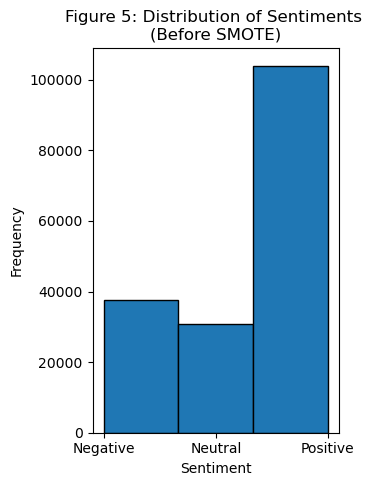

In [171]:
# Plot the distribution of sentiments before SMOTE
plt.figure(figsize=(7, 5))
plt.subplot(1, 2, 1)
plt.hist(y_train, edgecolor='black', bins=3, align='mid')
plt.title('Figure 5: Distribution of Sentiments \n(Before SMOTE)')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1, 2], labels=['Negative', 'Neutral', 'Positive'])
plt.show()


**Figure 5:** Currently very imbalanced, keeping the distribution of the total data. If this isn't adjusted, then the machine model will become biased towards positive results as there is more positive sentiment than there is neutral and negative combined.

In [34]:
%%time
smote = SMOTE()
X_train_SMT, y_train_SMT = smote.fit_resample(X_train, y_train)


Wall time: 2min 4s


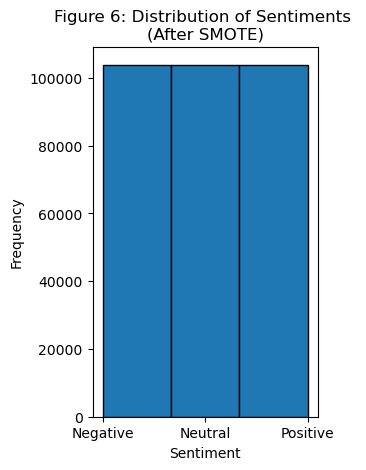

In [170]:
# Plot the distribution of sentiments after SMOTE
plt.subplot(1, 2, 2)
plt.hist(y_train_SMT, edgecolor='black', bins=3, align='mid')
plt.title('Figure 6: Distribution of Sentiments \n(After SMOTE)')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1, 2], labels=['Negative', 'Neutral', 'Positive'])
plt.show()


**Figure 6:** Using SMOTE, I have rebalanced this data so that the results called will be based on the preprocessed review text rather than mostly using sentiment proportionality.

## Logistic Regression

In [36]:
%%time
# Train the model
lr1 = LogisticRegression(penalty='l2', C=1, max_iter=1000)
lr1.fit(X_train_SMT, y_train_SMT)


Wall time: 2min 1s


LogisticRegression(C=1, max_iter=1000)

In [37]:
%%time
# Evaluate the model
print("Logistic Regression Train Accuracy: ", lr1.score(X_train_SMT, y_train_SMT))
print("Logistic Regression Test Accuracy: ", lr1.score(X_test, y_test))


Logistic Regression Train Accuracy:  0.7249813916480583
Logistic Regression Test Accuracy:  0.7008811289610117
Wall time: 161 ms


In [ ]:
## Previous Hyperparameter tuning with randomisedsearchcv
## Define the hyperparameter configuration
#distributions = dict(C=uniform(loc=0, scale=4), penalty=['l2', 'l1'])

## Use the random grid to search for best hyperparameters
#lr = LogisticRegression(max_iter=1000, solver='saga')
#random_search = RandomizedSearchCV(lr, distributions, random_state=0, n_iter=10, cv=3, verbose=4, n_jobs=-1)
## Fit the random search model
#random_search.fit(X_train, y_train)
## Print the best parameters
#print(random_search.best_params_)
## Train and evaluate model with best parameters
#best_lr = random_search.best_estimator_
#print("Train Accuracy: ", best_lr.score(X_train, y_train))
#print("Test Accuracy: ", best_lr.score(X_test, y_test))

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
## Hyperparameter tuning with gridsearchcv
## Define the hyperparameter grid
#param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l2', 'l1'], 'max_iter': [1000]}
## Create the Logistic Regression model
#lr = LogisticRegression(solver='saga')
## Create the grid search
#grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=3, n_jobs=-1, verbose=4)
## Fit the grid search
#grid_search.fit(X_train, y_train)
## Print the best parameters
#print(grid_search.best_params_)
## Train and evaluate the model with best parameters
#best_lr = grid_search.best_estimator_
#print("Train Accuracy: ", best_lr.score(X_train, y_train))
#print("Test Accuracy: ", best_lr.score(X_test, y_test))


## XGBoost Classifier

In [38]:
%%time
# Create xgboost hypertuned model
xgb1 = xgb.XGBClassifier(
    colsample_bytree=1.0,
    learning_rate=0.2,
    max_depth=7,
    n_estimators=150,
    subsample=0.8
)
xgb1.fit(X_train_SMT, y_train_SMT)


Wall time: 10min 19s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [39]:
%%time
# Make evaluate model accuracy
print("XGBClassifier Train Accuracy: ", xgb1.score(X_train_SMT, y_train_SMT))
print("XGBClassifier Test Accuracy: ", xgb1.score(X_test, y_test))


XGBClassifier Train Accuracy:  0.8167783167783168
XGBClassifier Test Accuracy:  0.7403808151024109
Wall time: 2.2 s


In [260]:
## xgb classifier model hyperparameter tuning with gridsearchcv
## Define the parameter grid
#param_grid = {
#    'learning_rate': [0.01, 0.1, 0.2],
#    'max_depth': [3, 5, 7],
#    'n_estimators': [50, 100, 150],
#    'subsample': [0.8, 1.0],
#    'colsample_bytree': [0.8, 1.0],
#}
## Create the XGBoost classifier
#xgb = XGBClassifier(use_label_encoder=False)
## Create the GridSearchCV object
#grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
#                           cv=3, n_jobs=-1, verbose=4, scoring='accuracy')
## Fit the GridSearchCV object to the data
#grid_search.fit(X_train, y_train)
## Print the best parameters and score
#print("Best parameters:", grid_search.best_params_)
#print("Best score:", grid_search.best_score_)

## Naive bayes

In [40]:
%%time
# Naive bayes hypertuned model

nb1 = MultinomialNB(alpha=0.1)
nb1.fit(X_train_SMT, y_train_SMT)


Wall time: 178 ms


MultinomialNB(alpha=0.1)

In [41]:
%%time
# Make evaluate model accuracy
print("MultinomialNB Train Accuracy: ", nb1.score(X_train_SMT, y_train_SMT))
print("MultinomialNB Test Accuracy: ", nb1.score(X_test, y_test))


MultinomialNB Train Accuracy:  0.638304971638305
MultinomialNB Test Accuracy:  0.6422011949875619
Wall time: 168 ms


In [ ]:
# Multinomial Naive bayes model hyperparameter tuning with gridsearchcv
## Define the parameter grid
#param_grid = {
#    'alpha': [0.1, 0.5, 1.0, 2.0],
#}
## Create the Multinomial Naive Bayes classifier
#nb = MultinomialNB()
## Create the GridSearchCV object
#grid_search = GridSearchCV(estimator=nb, param_grid=param_grid,
#                           cv=3, n_jobs=-1, verbose=4, scoring='accuracy')
# Evaluate the results
#print("Best Parameters: ", grid_search.best_params_)
#print("Best Score: ", grid_search.best_score_)


## Random forest

In [42]:
%%time
# Hypertuned RandomForestClassifier model

rf1 = RandomForestClassifier(max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=10, random_state=42)
rf1.fit(X_train_SMT, y_train_SMT)


Wall time: 1min 24s


RandomForestClassifier(max_depth=30, n_estimators=10, random_state=42)

In [43]:
%%time
# Make evaluate model accuracy
print("Random Foreset Train Accuracy: ", rf1.score(X_train_SMT, y_train_SMT))
print("Random Foreset Test Accuracy: ", rf1.score(X_test, y_test))


Random Foreset Train Accuracy:  0.9118605785272452
Random Foreset Test Accuracy:  0.7855532048450469
Wall time: 1.68 s


In [ ]:
## Random forest classifier model hyperparameter tuning with gridsearchcv
## Define the parameter grid
#param_grid = {
#    'n_estimators': [10, 20, 30],
#    'max_depth': [10, 20, 30, 50],
#    'min_samples_split': [2, 5, 8, 10],
#    'min_samples_leaf': [1, 2, 3],
#}

## Create the Random Forest classifier
#rf = RandomForestClassifier(random_state=42)

## Create the GridSearchCV object
#grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
#                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
## Fit the GridSearchCV object to the data
#grid_search.fit(X_train, y_train)
## Evaluate the results
#print("Best Parameters: ", grid_search.best_params_)
#print("Best Score: ", grid_search.best_score_)


## Neural Network

In [44]:
%%time
# Best model - RUN THIS
# Convert classes into one-hot format
y_train_onehot = to_categorical(y_train_SMT)
y_test_onehot = to_categorical(y_test)

# Create model architecture
ann1_2 = Sequential()
ann1_2.add(Dense(512, activation='relu', kernel_regularizer=l2(1e-6), input_shape=(5000,)))
ann1_2.add(Dropout(0.5))
ann1_2.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-6)))
ann1_2.add(Dropout(0.5))
ann1_2.add(Dense(3, activation='softmax'))

ann1_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_ann1_2 = ann1_2.fit(X_train_SMT, y_train_onehot, 
                   epochs=5,
                   batch_size=32,
                   validation_data=(X_test, y_test_onehot),
                   verbose=1)


Epoch 1/5
9741/9741 [==============================] - 309s 32ms/step - loss: 0.5810 - accuracy: 0.7628 - val_loss: 0.5274 - val_accuracy: 0.8073
Epoch 2/5
9741/9741 [==============================] - 310s 32ms/step - loss: 0.3088 - accuracy: 0.8946 - val_loss: 0.4560 - val_accuracy: 0.8558
Epoch 3/5
9741/9741 [==============================] - 313s 32ms/step - loss: 0.2217 - accuracy: 0.9308 - val_loss: 0.4458 - val_accuracy: 0.8719
Epoch 4/5
9741/9741 [==============================] - 312s 32ms/step - loss: 0.1928 - accuracy: 0.9433 - val_loss: 0.4660 - val_accuracy: 0.8762
Epoch 5/5
9741/9741 [==============================] - 315s 32ms/step - loss: 0.1790 - accuracy: 0.9492 - val_loss: 0.4698 - val_accuracy: 0.8847
Wall time: 25min 59s


In [45]:
%%time
# Evaluate the second regularised model
eval_metrics_train4 = ann1_2.evaluate(X_train_SMT, y_train_onehot)
print("Train Accuracy: ", eval_metrics_train4[1])

# Testing data
eval_metrics_test4 = ann1_2.evaluate(X_test, y_test_onehot)
print("Test Accuracy: ", eval_metrics_test4[1])

# Precision, Recall, and F1-Score:
# Predict classes
y_pred_ann1_2 = np.argmax(ann1_2.predict(X_test), axis=-1)
y_true_ann1_1 = np.argmax(y_test_onehot, axis=-1)

# Calculate precision, recall, and F1-score
precision_ann1_2 = precision_score(y_true_ann1_1, y_pred_ann1_2, average='macro')
recall_ann1_2 = recall_score(y_true_ann1_1, y_pred_ann1_2, average='macro')
f1_ann1_2 = f1_score(y_true_ann1_1, y_pred_ann1_2, average='macro')

print("Test Precision: ", precision_ann1_2)
print("Test Recall: ", recall_ann1_2)
print("Test F1-score: ", f1_ann1_2)


9741/9741 [==============================] - 49s 5ms/step - loss: 0.0826 - accuracy: 0.9888
Train Accuracy:  0.9888414144515991
1345/1345 [==============================] - 7s 5ms/step - loss: 0.4698 - accuracy: 0.8847
Test Accuracy:  0.8846627473831177
1345/1345 [==============================] - 4s 3ms/step
Test Precision:  0.8689097960595586
Test Recall:  0.831055217139704
Test F1-score:  0.8477047523549467
Wall time: 1min 1s


In [46]:
# Save the best NN model
ann1_2.save('model7.h5')


In [47]:
# Predict classes
y_pred_ann1_2 = np.argmax(ann1_2.predict(X_test), axis=-1)

# Print the classification report
report = classification_report(y_true_ann1_1, y_pred_ann1_2, target_names=['Class_0', 'Class_1', 'Class_2'])
print(report)


1345/1345 [==============================] - 4s 3ms/step
              precision    recall  f1-score   support

     Class_0       0.89      0.84      0.87      9423
     Class_1       0.82      0.69      0.75      7727
     Class_2       0.90      0.96      0.93     25863

    accuracy                           0.88     43013
   macro avg       0.87      0.83      0.85     43013
weighted avg       0.88      0.88      0.88     43013



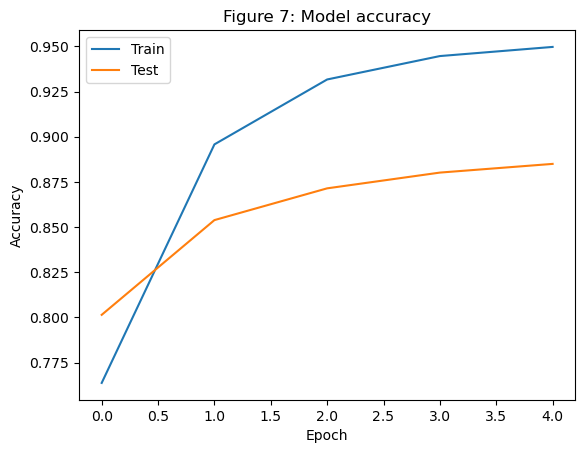

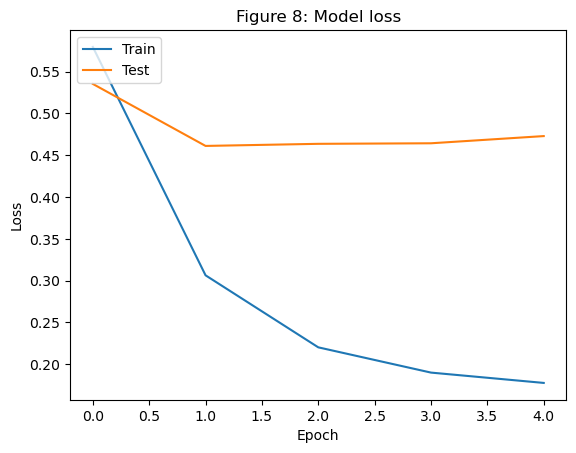

Wall time: 251 ms


In [107]:
%%time
# visualize the training and validation loss and accuracy:

plt.plot(history_ann1_2.history['accuracy'])
plt.plot(history_ann1_2.history['val_accuracy'])
plt.title('Figure 7: Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history_ann1_2.history['loss'])
plt.plot(history_ann1_2.history['val_loss'])
plt.title('Figure 8: Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


**Figure 7 & Figure 8:** This neural network shows far less overfitting than the previous models, as its training and validation accuracy increase in parallel to around 82% where testing becomes less accurate. Similarly, while there is significant test loss indicating improvements can be made to the model, it is far less than other models and earlier ANN models.

## Adding cross-validation to the 1e-6 NN model

In [50]:
%%time

def create_model():
    model = Sequential()
    model.add(Dense(512, activation='relu', kernel_regularizer=l2(1e-6), input_shape=(5000,)))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-6)))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, epochs=5, batch_size=32, verbose=1)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
y_train_labels = argmax(y_train_onehot, axis=1)
results = cross_val_score(model, X_train_SMT, y_train_labels, cv=kfold)
print("Cross-Validation Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


<timed exec>:16: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Epoch 1/5
8767/8767 [==============================] - 278s 32ms/step - loss: 0.5961 - accuracy: 0.7542
Epoch 2/5
8767/8767 [==============================] - 278s 32ms/step - loss: 0.3234 - accuracy: 0.8885
Epoch 3/5
8767/8767 [==============================] - 281s 32ms/step - loss: 0.2245 - accuracy: 0.9295
Epoch 4/5
8767/8767 [==============================] - 281s 32ms/step - loss: 0.1930 - accuracy: 0.9422
Epoch 5/5
975/975 [==============================] - 5s 5ms/step - loss: 0.2111 - accuracy: 0.9448
Epoch 1/5
8767/8767 [==============================] - 289s 33ms/step - loss: 0.5964 - accuracy: 0.7540
Epoch 2/5
8767/8767 [==============================] - 293s 33ms/step - loss: 0.3228 - accuracy: 0.8888
Epoch 3/5
8767/8767 [==============================] - 295s 34ms/step - loss: 0.2266 - accuracy: 0.9288
Epoch 4/5
8767/8767 [==============================] - 407s 46ms/step - loss: 0.1931 - accuracy: 0.9426
Epoch 5/5
975/975 [==============================] - 10s 10ms/step - 

## Ensemble methods model

In [51]:
%%time
# Create base models
lr_ens = LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=1)
dt_ens = DecisionTreeClassifier(max_depth=10, random_state=1)
knn_ens = KNeighborsClassifier(n_neighbors=5)

# Build the voting classifier
ens1 = VotingClassifier(estimators=[('lr', lr_ens), 
                                              ('dt', dt_ens), 
                                              ('knn', knn_ens)],
                                  voting='soft')


Wall time: 2 ms


In [122]:
%%time
# Fit the model on the training data
ens1.fit(X_train_SMT, y_train_SMT)


Wall time: 2min 36s


VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=1000,
                                                 multi_class='multinomial',
                                                 random_state=1)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=10,
                                                     random_state=1)),
                             ('knn', KNeighborsClassifier())],
                 voting='soft')

In [123]:
%%time
# Evaluate the model on the train and test data
print("Ensemble Train Accuracy: ", ens1.score(X_train, y_train))
print("Ensemble Test Accuracy: ", ens1.score(X_test, y_test))


Ensemble Train Accuracy:  0.8243940714908456
Ensemble Test Accuracy:  0.6775160997837864
Wall time: 59min 54s


# Word Importance and Model Word Predictions

## Which words are most important?

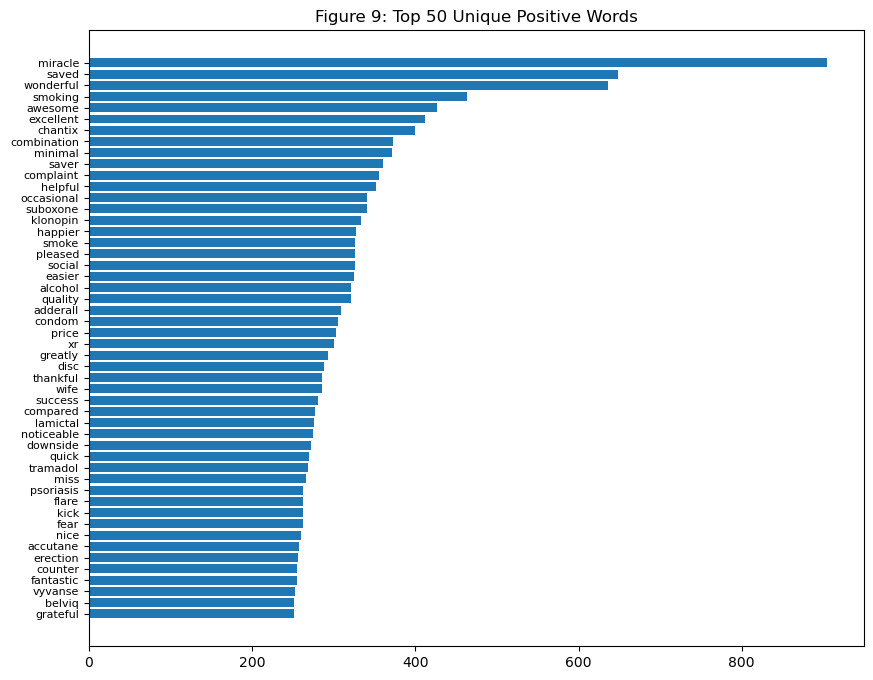

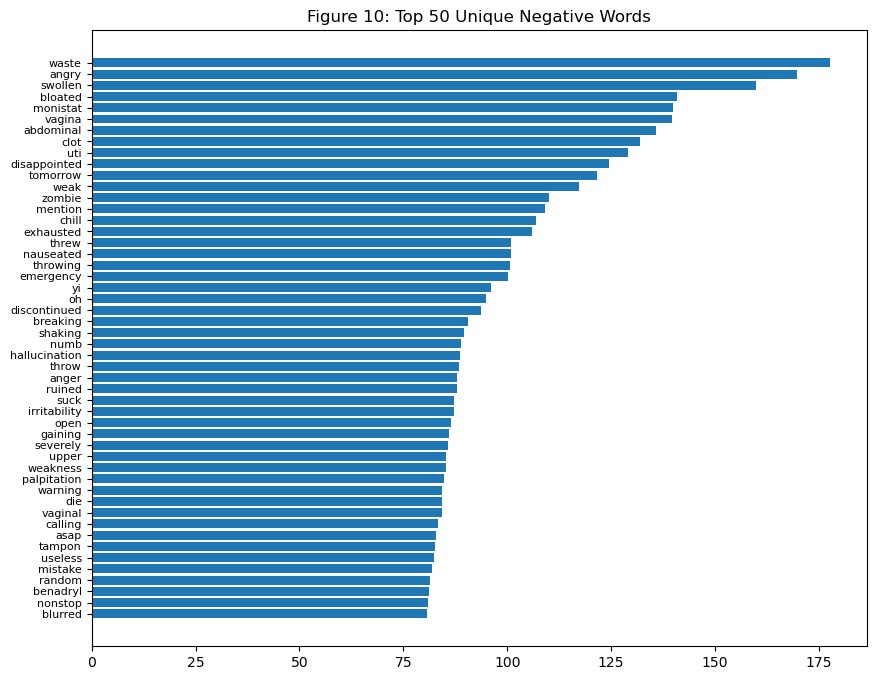

  Top 10 positive words Top 10 negative words
0               miracle                 waste
1                 saved                 angry
2             wonderful               swollen
3               smoking               bloated
4               awesome              monistat
5             excellent                vagina
6               chantix             abdominal
7           combination                  clot
8               minimal                   uti
9                 saver          disappointed
Wall time: 8.13 s


In [255]:
%%time
# Visualise most positive and negative words

# Split the data into positive and negative sentiment
pos_txt = df[df['sentiment'] == 'positive']['short']
neg_txt = df[df['sentiment'] == 'negative']['short']

# Function to get top words
def get_top_words(texts, max_features=1000):
    vec = TfidfVectorizer(max_features=max_features, stop_words='english')
    words = vec.fit_transform(texts)
    word_freq = words.sum(axis=0).A1
    word_names = vec.get_feature_names_out()
    return word_freq, word_names

# Get the top words for positive and negative sentiment
pos_word_freq, pos_word_names = get_top_words(pos_txt)
neg_word_freq, neg_word_names = get_top_words(neg_txt)

# Find words that are present in both positive and negative sentiment
common_words = set(pos_word_names).intersection(set(neg_word_names))

# Exclude common words
pos_unique_words = [(freq, word) for freq, word in zip(pos_word_freq, pos_word_names) if word not in common_words]
neg_unique_words = [(freq, word) for freq, word in zip(neg_word_freq, neg_word_names) if word not in common_words]

# Sort by frequency and take top 50
pos_unique_words = sorted(pos_unique_words, key=lambda x: -x[0])[:50]
neg_unique_words = sorted(neg_unique_words, key=lambda x: -x[0])[:50]

# Unpack frequencies and words
pos_word_freq, pos_word_names = zip(*pos_unique_words)
neg_word_freq, neg_word_names = zip(*neg_unique_words)

def plot_words_horizontal(word_freq, word_names, title):
    sorted_indices = np.argsort(word_freq)
    sorted_word_freq = word_freq[sorted_indices]
    sorted_word_names = np.array(word_names)[sorted_indices]

    plt.figure(figsize=(10, 8))
    plt.barh(sorted_word_names, sorted_word_freq)
    plt.title(title)
    plt.yticks(fontsize=8)
    plt.show()

# Plot top unique positive words horizontally
plot_words_horizontal(np.array(pos_word_freq), pos_word_names, 'Figure 9: Top 50 Unique Positive Words')

# Plot top unique negative words horizontally
plot_words_horizontal(np.array(neg_word_freq), neg_word_names, 'Figure 10: Top 50 Unique Negative Words')

# Create dataframe of top 10 positive and negative words

# Sort pos words by frequency and get top 10
top_10_pos_words = [word for _, word in sorted(zip(pos_word_freq, pos_word_names), reverse=True)[:10]]

# Sort negative words by frequency and get top 10
top_10_neg_words = [word for _, word in sorted(zip(neg_word_freq, neg_word_names), reverse=True)[:10]]

# Create DataFrame
top_words_df = pd.DataFrame({
    'Top 10 positive words': top_10_pos_words,
    'Top 10 negative words': top_10_neg_words
})

print(top_words_df)


**Figure 9 & 10:** These are just the most positive words found throughout the data, with no specific focus on any conditions. Most of the top positive and negative words were descriptive, but Chantix is a positively received smoking cessation drug and Monistat is a negatively reviewed drug which treats vaginal yeast infection.

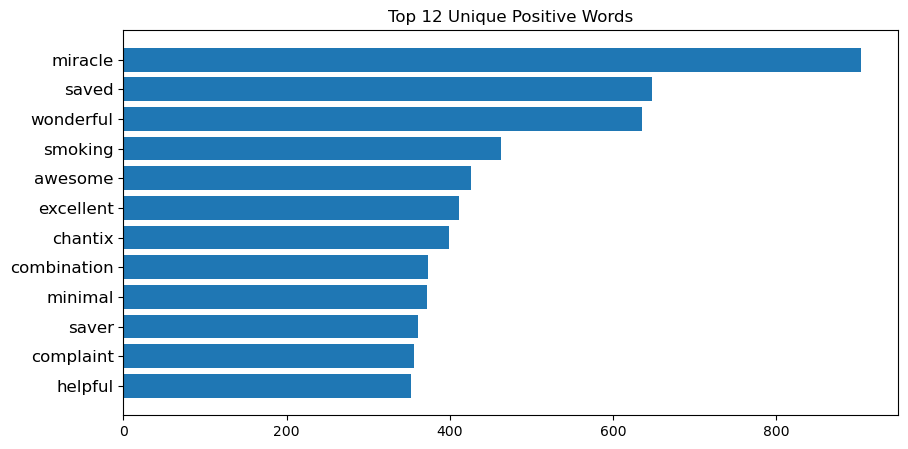

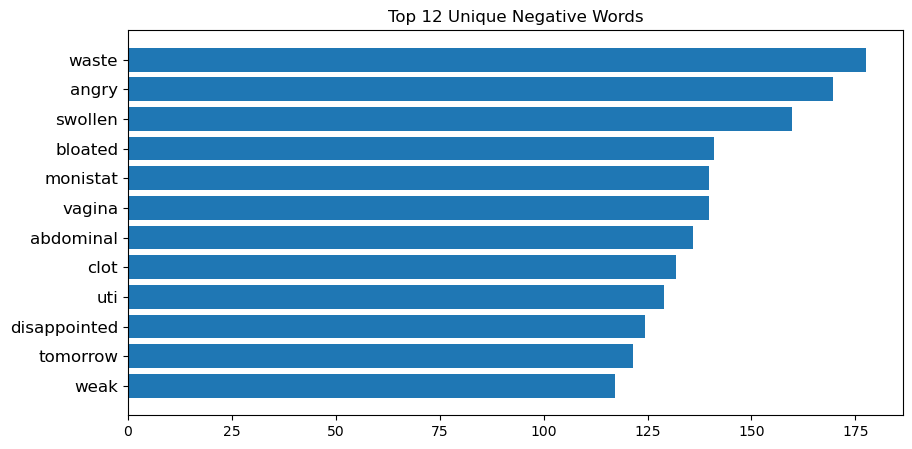

In [256]:
# For the presentation
# Sort by frequency and take top 50
pos_unique_words_quar = sorted(pos_unique_words, key=lambda x: -x[0])[:12]
neg_unique_words_quar = sorted(neg_unique_words, key=lambda x: -x[0])[:12]

# Unpack frequencies and words
pos_word_freq_q, pos_word_names_q = zip(*pos_unique_words_quar)
neg_word_freq_q, neg_word_names_q = zip(*neg_unique_words_quar)

def plot_words_horizontal_quar(word_freq, word_names, title):
    sorted_indices = np.argsort(word_freq)
    sorted_word_freq = word_freq[sorted_indices]
    sorted_word_names = np.array(word_names)[sorted_indices]

    plt.figure(figsize=(10, 5))
    plt.barh(sorted_word_names, sorted_word_freq)
    plt.title(title)
    plt.yticks(fontsize=12)
    plt.show()

    # Plot top unique positive words horizontally
plot_words_horizontal_quar(np.array(pos_word_freq_q), pos_word_names_q, 'Top 12 Unique Positive Words')

# Plot top unique negative words horizontally
plot_words_horizontal_quar(np.array(neg_word_freq_q), neg_word_names_q, 'Top 12 Unique Negative Words')


The plots above were generated for the capstone presentation only, they are only the top 12 positive & negative results from Figure 9 & 10.

## Which words are predicted to be most important?

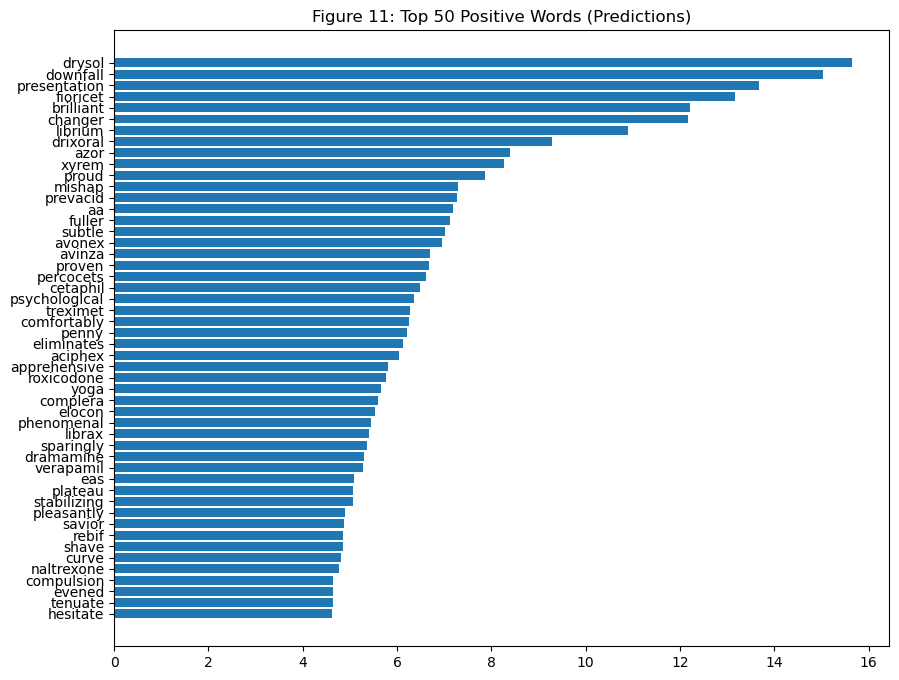

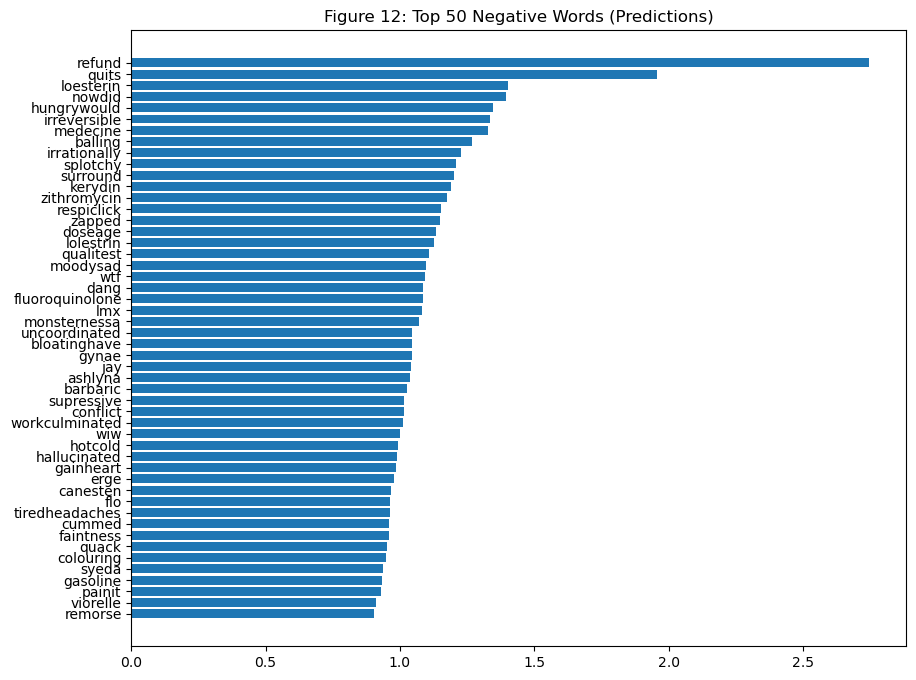

  Top 10 positive words Top 10 negative words
0                drysol                refund
1              downfall                 quits
2          presentation             loesterin
3              fioricet                nowdid
4             brilliant           hungrywould
5               changer          irreversible
6               librium              medecine
7              drixoral               balling
8                  azor          irrationally
9                 xyrem              splotchy
Wall time: 2.55 s


In [253]:
%%time
# Last Minute check
# Split the data to get the indices for the test set
_, test_indices, _, _ = train_test_split(df.index, y, test_size=0.2, random_state=42)

# Extract the corresponding preprocessed text for the test set
X_test_text = df['short'].iloc[test_indices]

# Define the segments based on the predicted classes
pos_txt_predictions = X_test_text[y_pred_ann1_2 == 2]
neg_txt_predictions = X_test_text[y_pred_ann1_2 == 0]

# Use TfidfVectorizer to count word occurrences, excluding common stop words
vec_pos = TfidfVectorizer(stop_words='english')
vec_neg = TfidfVectorizer(stop_words='english')
pos_words_predictions = vec_pos.fit_transform(pos_txt_predictions)
neg_words_predictions = vec_neg.fit_transform(neg_txt_predictions)

# Sum up the occurrences and sort by frequency
pos_word_freq_predictions = pos_words_predictions.sum(axis=0).A1
neg_word_freq_predictions = neg_words_predictions.sum(axis=0).A1
pos_word_names_predictions = vec_pos.get_feature_names_out()
neg_word_names_predictions = vec_neg.get_feature_names_out()

# Find common words in both positive and negative predictions
common_words_predicted = set(pos_word_names_predictions) & set(neg_word_names_predictions)

# Filter out the common words
top_pos_words = sorted([(freq, word) for freq, word in zip(pos_word_freq_predictions, pos_word_names_predictions) if word not in common_words_predicted], reverse=True)[:50]
top_neg_words = sorted([(freq, word) for freq, word in zip(neg_word_freq_predictions, neg_word_names_predictions) if word not in common_words_predicted], reverse=True)[:50]

# Plot top positive words (excluding common words)
plt.figure(figsize=(10, 8))
plt.barh([word for freq, word in top_pos_words[::-1]], [freq for freq, word in top_pos_words[::-1]])
plt.title('Figure 11: Top 50 Positive Words (Predictions)')
plt.show()

# Plot top negative words (excluding common words)
plt.figure(figsize=(10, 8))
plt.barh([word for freq, word in top_neg_words[::-1]], [freq for freq, word in top_neg_words[::-1]])
plt.title('Figure 12: Top 50 Negative Words (Predictions)')
plt.show()

# Create a DataFrame for the top 10 positive and negative words (excluding common words)
top_words_df_predictions = pd.DataFrame({
    'Top 10 positive words': [word for freq, word in top_pos_words[:10]],
    'Top 10 negative words': [word for freq, word in top_neg_words[:10]]
})

# Print the DataFrame
print(top_words_df_predictions)


**Figure 11 & 12:** Model predicted words generated different descriptive words due to being from a smaller sample size, and predicted many more drugs compared to **Figure 9 & 10**. Negative predicted drugs included Canesten (antifungal, including yeast infections), Sulfamethoxazole (another antifungal treatment), Loestrin (a now discontinued oral contraceptive) and Kerydin (antifungal treatement, for feet).

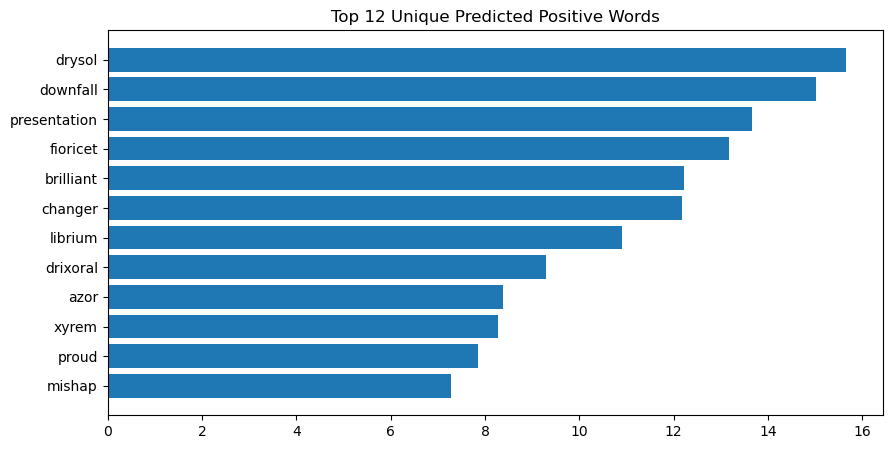

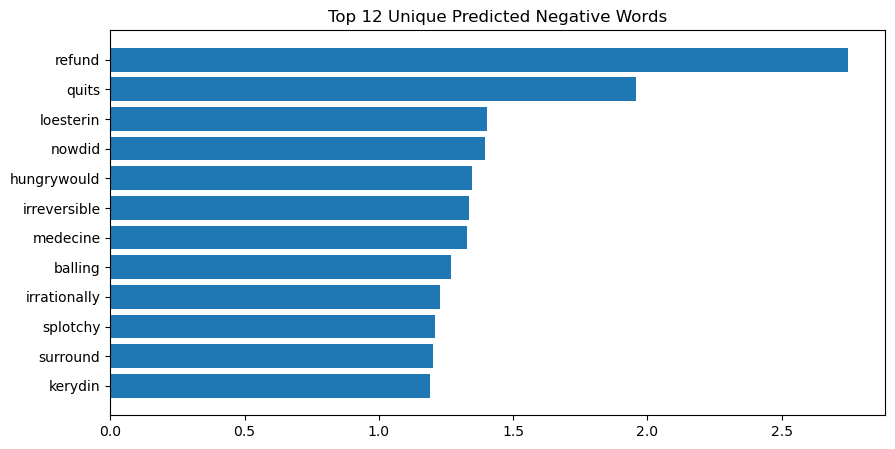

In [254]:
# For the presentation
# Filter out the common words
top_pos_words_quar = sorted([(freq, word) for freq, word in zip(pos_word_freq_predictions, pos_word_names_predictions) if word not in common_words_predicted], reverse=True)[:12]
top_neg_words_quar = sorted([(freq, word) for freq, word in zip(neg_word_freq_predictions, neg_word_names_predictions) if word not in common_words_predicted], reverse=True)[:12]

# Plot top positive words (excluding common words)
plt.figure(figsize=(10, 5))
plt.barh([word for freq, word in top_pos_words_quar[::-1]], [freq for freq, word in top_pos_words_quar[::-1]])
plt.title('Top 12 Unique Predicted Positive Words')
plt.show()

# Plot top negative words (excluding common words)
plt.figure(figsize=(10, 5))
plt.barh([word for freq, word in top_neg_words_quar[::-1]], [freq for freq, word in top_neg_words_quar[::-1]])
plt.title('Top 12 Unique Predicted Negative Words')
plt.show()


The plots above were generated for the capstone presentation only, they are only the top 12 positive & negative results from Figure 11 & 12.

## Top words for Birth Control, Vaginal Yeast Infection & Abnormal Uterine Bleeding

In [127]:
# List of specific conditions to analyze
conditions = ['Birth Control', 'Vaginal Yeast Infection', 'Abnormal Uterine Bleeding']

# Analyzing each condition
for condition in conditions:
    condition_reviews = df[df['condition'] == condition]

    # Lists to store top words for each sentiment category
    top_words = {
        'positive': [],
        'negative': [],
        'neutral': []
    }

    # Analyzing each sentiment category
    for sentiment in ['positive', 'negative', 'neutral']:
        sentiment_reviews = condition_reviews[condition_reviews['sentiment'] == sentiment]['short']

        # Get the top words for this sentiment
        word_freq, word_names = get_top_words(sentiment_reviews)

        # Exclude common words and take top 50
        unique_words = [(freq, word) for freq, word in zip(word_freq, word_names) if word not in common_words]
        top_words[sentiment] = sorted(unique_words, key=lambda x: -x[0])[:50]

    # Print or visualize results for this condition
    print(f"Top words for condition: {condition}")
    for sentiment, words in top_words.items():
        print(f"{sentiment.capitalize()}: {', '.join([word for freq, word in words])}")


Top words for condition: Birth Control
Positive: downfall, fuller, misoprostol
Negative: 
Neutral: 
Top words for condition: Vaginal Yeast Infection
Positive: terconazole, vagistat, equate, coconut, recurrent, cider, candida, cottage, tioconazole, aloe, braced, clove, pessary, boric, caplet, curing, digestion, infectioni, nether, nystatin, oval, vaseline, warming, prob, warns
Negative: canesten, coconut, itchingburning, cider, ivy, pepper, oval, gasoline, quotmonistat, residence
Neutral: itchingburning, coconut, nether, kitty, scented, cottage, cube, equate, monisat, terconazole, cider, dat, detergent, dragon, fastest, fireball, oval, squirming, majori, wiseday
Top words for condition: Abnormal Uterine Bleeding
Positive: megestrol, amenorrhea, dysmenorrhea, adenomyosis, brilliant, camreselo, disabling, interfering, jab, lightest, novasure, plucking, sensible
Negative: gush, cayenne, tranexamic
Neutral: balziva, uae, thrid, arroused, asexual, cruddy, dysmenorrhea, feeding, served, trisp

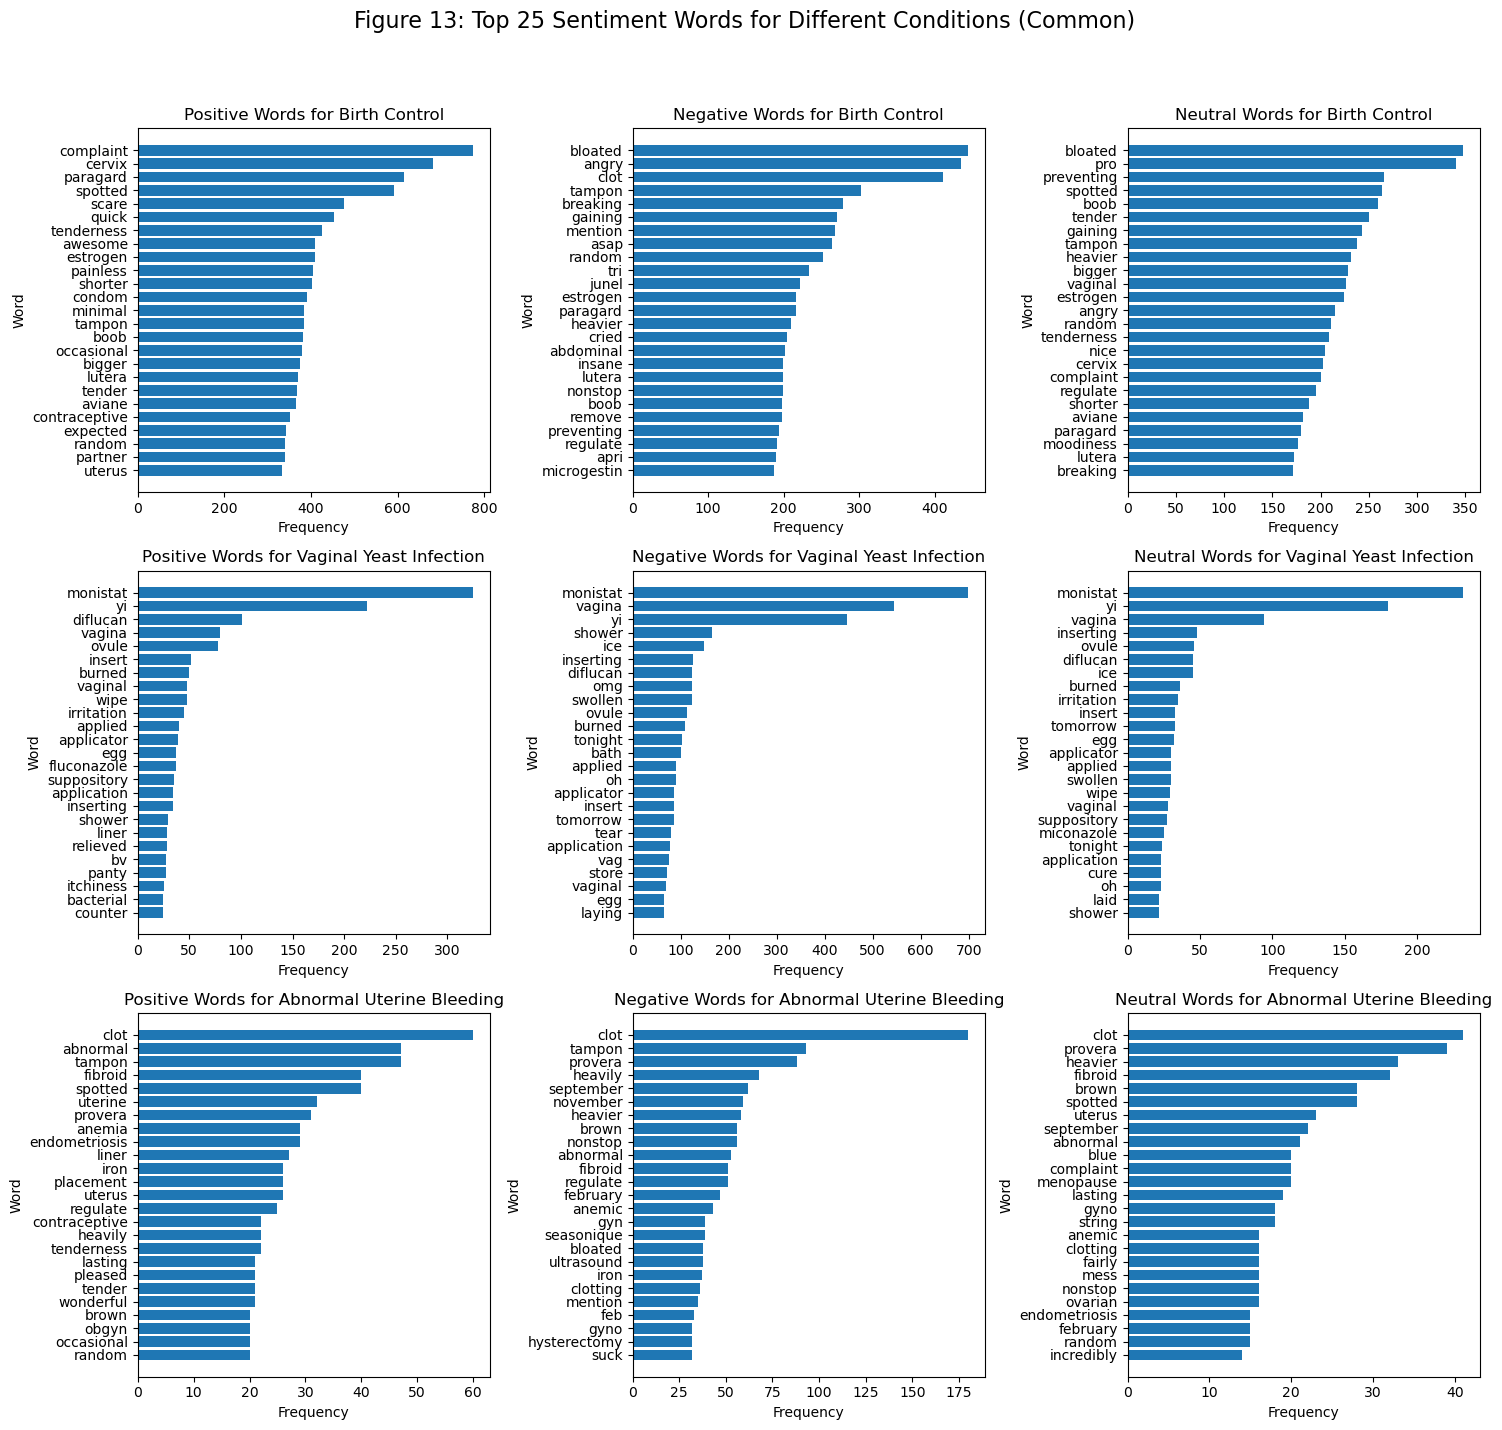

In [156]:
# List of specific conditions to analyze
conditions = ['Birth Control', 'Vaginal Yeast Infection', 'Abnormal Uterine Bleeding']

# Function to plot the top words
def plot_top_words(words, title, ax):
    word_freq, word_names = zip(*words[:25])
    ax.barh(word_names, word_freq)
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Word')
    ax.set_title(title)
    ax.invert_yaxis()

# Figure number
figure_number = 13

fig, axes = plt.subplots(len(conditions), 3, figsize=(15, 15))
plt.suptitle('Figure 13: Top 25 Sentiment Words for Different Conditions (Common)', fontsize=16)

# Analyzing each condition
for c_idx, condition in enumerate(conditions):
    condition_reviews = df[df['condition'] == condition]

    # Lists to store top words for each sentiment category
    top_words = {
        'positive': [],
        'negative': [],
        'neutral': []
    }

    # Analyzing each sentiment category
    for i, sentiment in enumerate(['positive', 'negative', 'neutral']):
        sentiment_reviews = condition_reviews[condition_reviews['sentiment'] == sentiment]['short']

        # Get the top words for this sentiment
        word_freq, word_names = get_top_words(sentiment_reviews)

        # Exclude common words and take top 25
        unique_words = [(freq, word) for freq, word in zip(word_freq, word_names) if word not in common_words]
        top_words[sentiment] = sorted(unique_words, key=lambda x: -x[0])[:25]

        # Plot the top words for this sentiment using the subplot axes
        plot_top_words(top_words[sentiment], f"{sentiment.capitalize()} Words for {condition}", axes[c_idx, i])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


**Figure 13:** Many of these share common words, although they do have varying total counts. This might account for some of the issues my model has experienced with identifying positive, neutral and negative sentiment. 

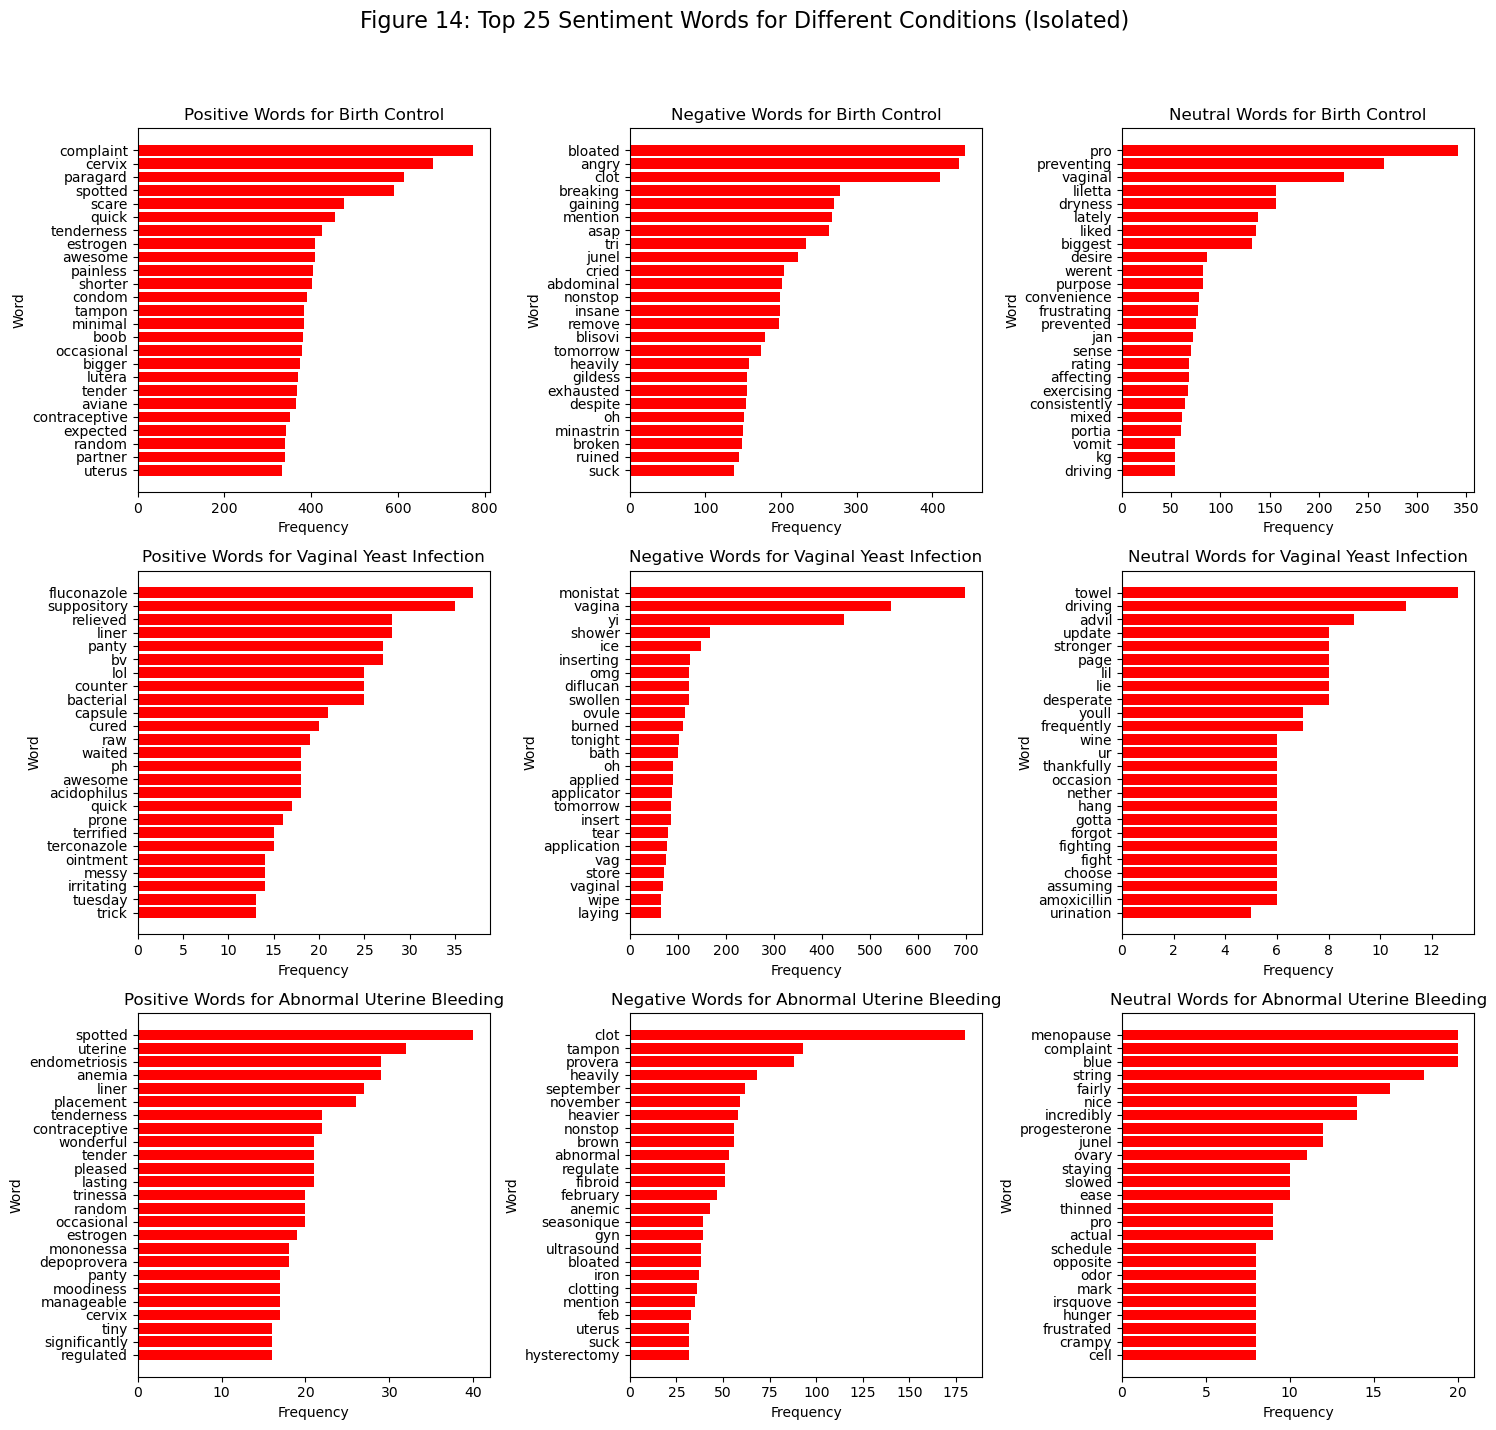

In [157]:
# Function to plot the top words with different colors

def plot_top_words_alt(words, title, ax):
    word_freq, word_names, word_colors = zip(*words)
    ax.barh(word_names, word_freq, color=word_colors)
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Word')
    ax.set_title(title)
    ax.invert_yaxis()

fig, axes = plt.subplots(len(conditions), 3, figsize=(15, 15))
plt.suptitle('Figure 14: Top 25 Sentiment Words for Different Conditions (Isolated)', fontsize=16)

# Analyzing each condition
for c_idx, condition in enumerate(conditions):
    condition_reviews = df[df['condition'] == condition]

    # Collect top words for each sentiment category
    all_words = {}
    for sentiment in ['positive', 'negative', 'neutral']:
        sentiment_reviews = condition_reviews[condition_reviews['sentiment'] == sentiment]['short']
        word_freq, word_names = get_top_words(sentiment_reviews)
        for freq, word in sorted(zip(word_freq, word_names), key=lambda x: -x[0]):
            if word not in common_words:
                if word not in all_words:
                    all_words[word] = (freq, sentiment)
                else:
                    all_words[word] = max(all_words[word], (freq, sentiment), key=lambda x: x[0])

    # Prepare words for plotting
    top_words = {sentiment: [] for sentiment in ['positive', 'negative', 'neutral']}
    for word, (freq, sentiment) in all_words.items():
        color = 'blue' if all(item[1] != sentiment for item in all_words.values()) else 'red'
        top_words[sentiment].append((freq, word, color))

    # Plot the top words for this condition
    for i, sentiment in enumerate(['positive', 'negative', 'neutral']):
        plot_top_words_alt(sorted(top_words[sentiment], reverse=True)[:25], f"{sentiment.capitalize()} Words for {condition}", axes[c_idx, i])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


**Figure 14:** Unexpectedly all the words are red, indicating that all are shared between positive, negative or neutral sentiment predictions, whereas a blue word would indicate it is found in only one sentiment. The model may instead rely on the frequency of words present under each sentiment context and make predictions based on that outcome.

## Final thoughts on Word Importance:

It is much easier to segregate words between positive, neutral and negative but when filtering within conditions there doesn't seem to be enough data that can be isolated. 


Future considerations might include further refinement of NLP, as I caught some lemmatization errors where the base word seemed unrecognisable. This was likely due to errors in preprocessing, which could potentially be fixed.

# Part 2 - Is the model easily transferable? Rating instead of Sentiment

In [61]:
# Check data
df.head()

,drugname,condition,review,rating,date,usefulcount,sentiment,short
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27,positive,it ha no side effect i take it in combination ...
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,positive,my son is halfway through his fourth week of i...
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17,neutral,i used to take another oral contraceptive whic...
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,positive,this is my first time using any form of birth ...
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37,positive,suboxone ha completely turned my life around i...


In [118]:
%%time
# Create new y target for rating, -1 so it fit the assumption 0 - 9
y2 = df['rating'] - 1

# Split the data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size=0.2, random_state=59)

# Rebalance with SMOTE
X_train_SMT2, y_train_SMT2 = smote.fit_resample(X_train2, y_train2)


Wall time: 2min 17s


## Logistic Regression

In [119]:
%%time
# Train the model
lr_rate1 = LogisticRegression(penalty='l2', C=1, max_iter=1000)
lr_rate1.fit(X_train_SMT2, y_train_SMT2)

# Evaluate the model
print("Logistic Regression Train Accuracy: ", lr_rate1.score(X_train_SMT2, y_train_SMT2))
print("Logistic Regression Test Accuracy: ", lr_rate1.score(X_test2, y_test2))


Logistic Regression Train Accuracy:  0.521400327368363
Logistic Regression Test Accuracy:  0.36077464952456234
Wall time: 9min 10s


## XGBooster

In [116]:
%%time

# Use previous best xgboost model
xgb_rate1 = xgb.XGBClassifier(
    colsample_bytree=1.0,
    learning_rate=0.2,
    max_depth=7,
    n_estimators=150,
    subsample=0.8
)
xgb_rate1.fit(X_train_SMT2, y_train_SMT2)

# Evaluate model accuracy
print("XGBClassifier Train Accuracy: ", xgb_rate1.score(X_train_SMT2, y_train_SMT2))
print("XGBClassifier Test Accuracy: ", xgb_rate1.score(X_test2, y_test2))


XGBClassifier Train Accuracy:  0.7648189358689055
XGBClassifier Test Accuracy:  0.04793899518750145
Wall time: 1h 20min 22s


## Naive Bayes

In [120]:
%%time

# Use previous best naive bayes model
nb_rate1 = MultinomialNB(alpha=0.1)
nb_rate1.fit(X_train2, y_train2)

# Evaluate the model on the train and test data
print("MultinomialNB Train Accuracy: ", nb_rate1.score(X_train_SMT2, y_train_SMT2))
print("MultinomialNB Test Accuracy: ", nb_rate1.score(X_test2, y_test2))


MultinomialNB Train Accuracy:  0.15441487502988616
MultinomialNB Test Accuracy:  0.38999837258503245
Wall time: 450 ms


## Random Forest rating prediction

In [121]:
%%time

# Use previous best randomforestclassifier model
rf_rate1 = RandomForestClassifier(max_depth=80, min_samples_leaf=1, min_samples_split=2, n_estimators=10, random_state=42)
rf_rate1.fit(X_train2, y_train2)

# Evaluate the model on the train and test data
print("Random Foreset Train Accuracy: ", rf1.score(X_train2, y_train2))
print("Random Foreset Test Accuracy: ", rf1.score(X_test2, y_test2))


Random Foreset Train Accuracy:  0.12354548096483581
Random Foreset Test Accuracy:  0.12166089321832935
Wall time: 1min 35s


## Ensemble rating prediction

In [115]:
%%time
# Use previous voting classifier
ens_rate1 = VotingClassifier(estimators=[('lr', lr_ens), 
                                              ('dt', dt_ens), 
                                              ('knn', knn_ens)],
                                  voting='soft')

# Use previous best model
ens_rate1.fit(X_train2, y_train2)

# Evaluate the model on the train and test data
print("Ensemble Train Accuracy: ", ens_rate1.score(X_train2, y_train2))
print("Ensemble Test Accuracy: ", ens_rate1.score(X_test2, y_test2))


Ensemble Train Accuracy:  0.6140249927346701
Ensemble Test Accuracy:  0.45228186827238276
Wall time: 37min 14s


## Failed neural network rating prediction

In [ ]:
#%%time
## Convert classes into one-hot format
#y_train_rate_onehot = to_categorical(y_train_SMT2)
#y_test_rate_onehot = to_categorical(y_test2)

## Use previous best neural network architecture
#ann_rate1 = Sequential()
#ann_rate1.add(Dense(512, activation='relu', kernel_regularizer=l2(1e-6), input_shape=(5000,)))
#ann_rate1.add(Dropout(0.5))
#ann_rate1.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-6)))
#ann_rate1.add(Dropout(0.5))
#ann_rate1.add(Dense(10, activation='softmax'))  # 10 units since there are 10 ratings

#ann_rate1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#history_ann_rate1 = ann_rate1.fit(X_train_SMT2, y_train_rate_onehot, 
#                                  epochs=5,
#                                  batch_size=32,
#                                  validation_data=(X_test2, y_test_rate_onehot),
#                                  verbose=1)

## Evaluate the model on training data
#eval_rate_train1 = ann_rate1.evaluate(X_train_SMT2, y_train_rate_onehot)
#print("Train Accuracy: ", eval_rate_train1[1])

## Evaluate the model on testing data
#eval_rate_test1 = ann_rate1.evaluate(X_test2, y_test_rate_onehot)
#print("Test Accuracy: ", eval_rate_test1[1])

## Precision, Recall, and F1-Score:
## Predict classes using the model
#y_pred_rate1 = np.argmax(ann_rate1.predict(X_test2), axis=-1)
#y_true_rate1 = np.argmax(y_test_rate_onehot, axis=-1)

## Calculate precision, recall, and F1-score
#precision_rate1 = precision_score(y_true_rate1, y_pred_rate1, average='macro')
#recall_rate1 = recall_score(y_true_rate1, y_pred_rate1, average='macro')
#f1_rate1 = f1_score(y_true_rate1, y_pred_rate1, average='macro')

#print("Test Precision: ", precision_rate1)
#print("Test Recall: ", recall_rate1)
#print("Test F1-score: ", f1_rate1)


Neural network left in for completeness of testing.

## Thoughts on model transferability:
These models are not easily transferable. This makes sense as while they are trained on identical data, there are significant differences between how they relate to both the 3 sentiment categories and 10 rating categories. Predicing Ratings is much harder due to the increased words overlapping in 10 categories, while I was already seeing differences with a single extra neutral category with Sentiment.

Interestingly the simpler logistic regression model, and ensemble method model gave the best results, opposite to what I found when building models for the 3 category sentiment target.

# App creation using Gradio


In [267]:
%%time
# Load the model
ann = load_model('model7.h5')

# Preprocess your text as before, using a function
def preprocess(text):
    # Normalize text
    text = text.lower()
    text = re.sub('[^a-z ]', '', text)

    # Tokenization
    tokens = text.split()

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(item) for item in tokens]

    # Combine tokens back into a string
    return ' '.join(tokens)

# Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
# Fit the vectorizer on preprocessed text
X = vectorizer.fit_transform(df['short'].apply(preprocess))

# Prediction function
def predict(text):
    # Preprocess the text
    text = preprocess(text)

    # Vectorize the text using the fitted vectorizer
    text_vectorized = vectorizer.transform([text])

    # Convert the sparse matrix to a dense matrix
    text_vectorized_dense = text_vectorized.toarray()

    # Ensure the input shape matches what the model expects
    if text_vectorized_dense.shape[1] != 5000:
        return "Error: input text could not be vectorized properly"

    # Predict
    prediction = ann.predict(text_vectorized_dense)
    predicted_class = np.argmax(prediction)

    # Return the result based on the predicted class
    return {0: 'Negative', 1: 'Neutral', 2: 'Positive'}.get(predicted_class, "Error: Unexpected class")

# Create the interface
gui = gr.Interface(
    fn=predict,
    inputs=gr.Textbox(lines=5, label="Customer Review"),
    outputs=gr.Label(label="Sentiment"),
    title="Opinify"
)

# Launch the interface
gui.launch()


Running on local URL:  http://127.0.0.1:7864

To create a public link, set `share=True` in `launch()`.


Wall time: 1min 1s


In [74]:
# Exrtract reviews to test on the model, to see if predicted values match with what is expected
# Extracting 10 rows for each sentiment
positive_reviews = df[df['sentiment'] == 'positive']['review'].sample(10)
neutral_reviews = df[df['sentiment'] == 'neutral']['review'].sample(10)
negative_reviews = df[df['sentiment'] == 'negative']['review'].sample(10)

# Use option_context to temporarily set display.max_colwidth
with pd.option_context('display.max_colwidth', None):
    print("Positive Reviews:")
    for review in positive_reviews:
        print(review)
    print("\nNeutral Reviews:")
    for review in neutral_reviews:
        print(review)
    print("\nNegative Reviews:")
    for review in negative_reviews:
        print(review)


Positive Reviews:
"I have suffered major depression for many years and have taken almost every SSRI that has been on the market.  I recently slipped into a bout of very deep depression and was almost suicidal.  Cymbalta pulled me out of it.  I am very thankful for this medication because it brought ME back.  However, it was not working at 60mg a day so the doctor increased it to 120mg a day.  I realize that is a high dose but the benefits outweigh the risks by far in my situation.  I was in the deepest darkest depression for about 3 months and almost lost my job over it.  Cymbalta saved me... literally."
"I have been using this for years for my migraines. I was on the lower dose until the last 6 months. My dosage was increased because the lower dose quit working for me. I would have to take one, wait 2 hours then take a 2nd one, and most of the time I ended up in the ER for a &quot;migraine cocktail&quot; because it wouldn&#039;t go away. ANYWAY, after my dosage was increased it worked

# Final thoughts for this Project

## Findings

My best model was a neural network with 2 hidden layers that excelled in several evaluation metrics, with training accuracy of 98.8%, testing accuracy of 88.4%, recall for both positive and negative sentiment at 84% and above, and finally precision for positive and negative sentiment at 90% and higher.

I identified the majority of reviewed conditions and their associated drugs were well received by customers. Drugs with more than 500 reviews typically had an average rating between 8 and 6. Only 3 conditions, birth control, vaginal yeast infection and abnormal uterine bleeding exhibited significantly more negative reviews than the typical distribution seen in this data. Similarly, the birth control drugs Depo Provera, Loestrin and the antifungal drugs Canesten, Sulfamethoxazole, and Kerydin are all associated with negative customer sentiment. These drugs and conditions represent potential niches of unmet needs and opportunities for market research and new project developments. It was interesting to see the most negative conditions, and many poorly received drugs specifically target women. These unmet needs for female pharmaceutical agents hint at an opportunity to change their approach in women-focussed research, marketing or other related areas to gain a significant advantage over competitors for a target population that is roughly half their potential market.

By integrating my data science approach with the initial business question, I was able to craft a targeted solution to the problem. Using a simple app, I am able to preprocess text and predict sentiment for new, unseen data which is usable by non-technical stakeholders including marketing coordinators, public relations managers, sales teams, R&D and more. These advantages confer immense value to this app for any pharmaceutical agencies looking to utilise their customer base information to drive company developments.


## Limitations & Future Steps:

- I think a weakness of my model was its predicted words having such a large portion of drug names rather than descriptive words
- I feel this wouldn't generalise well to new drug data and especially poorly if investigating a selected drug or panel data changes over time like changes in customer sentiment.
- I am interested in finding ways to address this weakness, perhaps by removing all drugnames in the review itself or by trying to make the model view it as less important
- I would like to compare this project against an identical model built with a binary (positive and negative) target instead, to see if that improves accuracy with predictions
- Improve on my preprocessing steps, as I have seen instances of drug names and brand names occurring in the same plots
- Gain a better understanding of current female-specific conditions and drugs, to gain a competitive advantage in the market.
- Develop the app further to potentially handle multiple reviews at once
